# FIGURE PLOTTING

### solid colour 2006 only

In [2]:
from matplotlib.colors import ListedColormap
import rasterio
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd 
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.lines import Line2D
import matplotlib.patches as mpatches
import matplotlib.cm as cm
import matplotlib.colors as mcolors
import pandas as pd

In [4]:
xlimit = (1025000, 1140000)
ylimit = (-2148431.9935, -2033743.9935)

xlimit2 = (1025000, 1210000)
ylimit2 = (-2148431.9935, -2033743.9935)

In [16]:
tif_path = "eff_strain_2018_TEST.tif"
with rasterio.open(tif_path) as src:
    eff_strain = src.read(1)
    extent = [src.bounds.left, src.bounds.right, src.bounds.bottom, src.bounds.top]

groundingline = gpd.read_file('2003_GL_full_cook_complete_dissolved_larger.shp')
coastline = gpd.read_file('ice_front_2006.shp')
current_crevasses = gpd.read_file('crevasses_identified.shp')
ice_fronts_2006_to_2018 = gpd.read_file('COMBINED_ice_front_2006_to_2018.shp')


RasterioIOError: eff_strain_2018_TEST.tif: No such file or directory

In [18]:
annual_area = pd.read_excel('annual_area.xlsx')
area_year = annual_area['Year']
area = annual_area['Annual_Area(km2)']

NameError: name 'vel_mean' is not defined

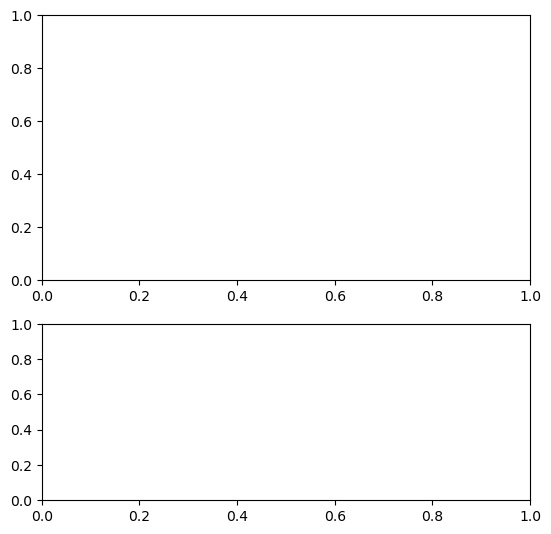

In [34]:
fig, axes = plt.subplots(2, 1, figsize=(160/25.4, 160/25.4), gridspec_kw={'height_ratios': [3,2]})

ax0 = axes[0]
vel_mean = np.ma.masked_invalid(vel_mean)
solid_cmap = ListedColormap(['white'])

first_img_plot = ax0.imshow(eff_strain, cmap='Greys', extent=extent, origin='upper', vmin=0, vmax=0.005)

groundingline.plot(ax=ax0, edgecolor='black', facecolor='azure', linewidth=2, label='Grounding Line', alpha=0.8)
coastline.plot(ax=ax0, edgecolor='green', facecolor='none', linewidth=2, label='Ice Front')
current_crevasses.plot(ax=ax0, edgecolor='black', facecolor='red', linewidth=1, label='Crevasses')
#ice_fronts_2006_to_2018.plot(ax=ax0, edgecolor='green', facecolor='none', linewidth=1, label='Ice Front')



divider0 = make_axes_locatable(ax0)
cax0 = divider0.append_axes("right", size="5%", pad=0.1)
cbar0 = fig.colorbar(first_img_plot, cax=cax0)
for label in cbar0.ax.get_yticklabels():
    label.set_fontname('Times New Roman')
    label.set_fontsize(10)
cbar0.set_label("Effective Strain Rate (a-1)", fontsize=10, fontfamily='Times New Roman')

ax0.set_xlabel('Eastings (m)', fontsize=10, fontfamily='Times New Roman')
ax0.set_ylabel('Northings (m)', fontsize=10, fontfamily='Times New Roman')
for label in (ax0.get_xticklabels() + ax0.get_yticklabels()):
    label.set_fontsize(10)
    label.set_family('Times New Roman')
ax0.xaxis.get_offset_text().set_fontname('Times New Roman')
ax0.xaxis.get_offset_text().set_fontsize(10)
ax0.yaxis.get_offset_text().set_fontname('Times New Roman')
ax0.yaxis.get_offset_text().set_fontsize(10)
ax0.tick_params(direction='in')
ax0.set_xlim(xlimit2)
ax0.set_ylim(ylimit2)
ax0.set_aspect('equal')

#########################################################


ax1 = axes[1]
second_plot = ax1.scatter(area_year, area, color='k', s=20)
ax1.set_xlabel('Year', fontsize=10, fontfamily='Times New Roman')
ax1.set_ylabel('Area (m/yr)', fontsize=10, fontfamily='Times New Roman')
#ax1.set_ylim(2000, 2500)
#ax1.set_xlim(2006, 2018)
for label in (ax1.get_xticklabels() + ax1.get_yticklabels()):
    label.set_fontsize(10)
    label.set_family('Times New Roman')
ax1.xaxis.get_offset_text().set_fontname('Times New Roman')
ax1.xaxis.get_offset_text().set_fontsize(10)
ax1.yaxis.get_offset_text().set_fontname('Times New Roman')
ax1.yaxis.get_offset_text().set_fontsize(10)
ax1.tick_params(direction='in')

#########################################################
ax0.text(0.03, 0.95, "a.", transform=ax0.transAxes, fontsize=10, fontname = 'Times New Roman', fontweight='bold', va='top', ha='left')
ax1.text(0.03, 0.95, "b.", transform=ax1.transAxes, fontsize=10, fontname = 'Times New Roman', fontweight='bold', va='top', ha='left')

plt.tight_layout(pad=0.1, h_pad=0.2)
#plt.savefig('figure_1_proper.jpg', dpi=500, bbox_inches='tight')
plt.show()

### binary geotiff

creating a binary geotiff for 0.001 to 0.163 a-1:

In [101]:
tif_path = "eff_strain_2018_TEST.tif"
output_path = "eff_strain_2018_binary.tif"

with rasterio.open(tif_path) as src:
    eff_strain = src.read(1)  
    profile = src.profile    

binary_arr = np.where(eff_strain >= 0.001, 1, 0).astype(np.uint8)

profile.update(
    dtype=rasterio.uint8,
    count=1,
)

with rasterio.open(output_path, 'w', **profile) as dst:
    dst.write(binary_arr, 1)

In [103]:
tif_path = "eff_strain_2018_binary.tif"
with rasterio.open(tif_path) as src:
    eff_strain_binary = src.read(1)
    extent = [src.bounds.left, src.bounds.right, src.bounds.bottom, src.bounds.top]

groundingline = gpd.read_file('2003_GL_full_cook_complete_dissolved_larger.shp')
coastline = gpd.read_file('ice_front_2006.shp')
current_crevasses = gpd.read_file('crevasses_identified.shp')


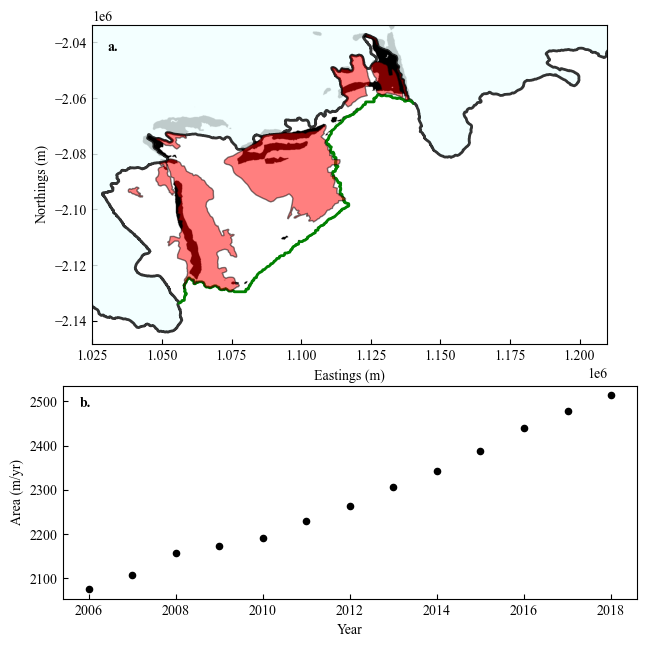

In [123]:
fig, axes = plt.subplots(2, 1, figsize=(160/25.4, 160/25.4), gridspec_kw={'height_ratios': [3,2]})

ax0 = axes[0]
vel_mean = np.ma.masked_invalid(vel_mean)
solid_cmap = ListedColormap(['white'])

first_img_plot = ax0.imshow(eff_strain_binary, cmap='Greys', extent=extent, origin='upper', vmin=0, vmax=0.005)

groundingline.plot(ax=ax0, edgecolor='black', facecolor='azure', linewidth=2, label='Grounding Line', alpha=0.8)
coastline.plot(ax=ax0, edgecolor='green', facecolor='none', linewidth=2, label='Ice Front')
current_crevasses.plot(ax=ax0, edgecolor='black', facecolor='red', linewidth=1, label='Crevasses', alpha=0.5)



# divider0 = make_axes_locatable(ax0)
# cax0 = divider0.append_axes("right", size="5%", pad=0.1)
# cbar0 = fig.colorbar(first_img_plot, cax=cax0)
# for label in cbar0.ax.get_yticklabels():
#     label.set_fontname('Times New Roman')
#     label.set_fontsize(10)
# cbar0.set_label("Effective Strain Rate (a-1)", fontsize=10, fontfamily='Times New Roman')

ax0.set_xlabel('Eastings (m)', fontsize=10, fontfamily='Times New Roman')
ax0.set_ylabel('Northings (m)', fontsize=10, fontfamily='Times New Roman')
for label in (ax0.get_xticklabels() + ax0.get_yticklabels()):
    label.set_fontsize(10)
    label.set_family('Times New Roman')
ax0.xaxis.get_offset_text().set_fontname('Times New Roman')
ax0.xaxis.get_offset_text().set_fontsize(10)
ax0.yaxis.get_offset_text().set_fontname('Times New Roman')
ax0.yaxis.get_offset_text().set_fontsize(10)
ax0.tick_params(direction='in')
ax0.set_xlim(xlimit2)
ax0.set_ylim(ylimit2)
ax0.set_aspect('equal')

#########################################################


ax1 = axes[1]
second_plot = ax1.scatter(area_year, area, color='k', s=20)
ax1.set_xlabel('Year', fontsize=10, fontfamily='Times New Roman')
ax1.set_ylabel('Area (m/yr)', fontsize=10, fontfamily='Times New Roman')
#ax1.set_ylim(2000, 2500)
#ax1.set_xlim(2006, 2018)
for label in (ax1.get_xticklabels() + ax1.get_yticklabels()):
    label.set_fontsize(10)
    label.set_family('Times New Roman')
ax1.xaxis.get_offset_text().set_fontname('Times New Roman')
ax1.xaxis.get_offset_text().set_fontsize(10)
ax1.yaxis.get_offset_text().set_fontname('Times New Roman')
ax1.yaxis.get_offset_text().set_fontsize(10)
ax1.tick_params(direction='in')

#########################################################
ax0.text(0.03, 0.95, "a.", transform=ax0.transAxes, fontsize=10, fontname = 'Times New Roman', fontweight='bold', va='top', ha='left')
ax1.text(0.03, 0.95, "b.", transform=ax1.transAxes, fontsize=10, fontname = 'Times New Roman', fontweight='bold', va='top', ha='left')

plt.tight_layout(pad=0.1, h_pad=0.2)
#plt.savefig('figure_1_proper_TEST.jpg', dpi=500, bbox_inches='tight')
plt.show()

### all ice front years

In [176]:
from matplotlib.colors import ListedColormap
import rasterio
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd 
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.lines import Line2D
import matplotlib.patches as mpatches
import matplotlib.cm as cm
import matplotlib.colors as mcolors
import pandas as pd


In [178]:
xlimit = (1025000, 1140000)
ylimit = (-2148431.9935, -2033743.9935)

xlimit2 = (1025000, 1210000)
ylimit2 = (-2148431.9935, -2033743.9935)

In [180]:
tif_path = "eff_strain_2018_TEST.tif"
with rasterio.open(tif_path) as src:
    eff_strain = src.read(1)
    extent = [src.bounds.left, src.bounds.right, src.bounds.bottom, src.bounds.top]

groundingline = gpd.read_file('2003_GL_full_cook_complete_dissolved_larger.shp')
current_crevasses = gpd.read_file('crevasses_identified.shp')

ice_front_2006 = gpd.read_file(r'C:\Users\jjls0\OneDrive\Documents\HONOURS\PROGRAMS\zzResults_Figures\Crevassing_Calving\figure_1\ice_fronts\ice_front_2006.shp')
ice_front_2007 = gpd.read_file(r'C:\Users\jjls0\OneDrive\Documents\HONOURS\PROGRAMS\zzResults_Figures\Crevassing_Calving\figure_1\ice_fronts\ice_front_2007.shp')
ice_front_2008 = gpd.read_file(r'C:\Users\jjls0\OneDrive\Documents\HONOURS\PROGRAMS\zzResults_Figures\Crevassing_Calving\figure_1\ice_fronts\ice_front_2008.shp')
ice_front_2009 = gpd.read_file(r'C:\Users\jjls0\OneDrive\Documents\HONOURS\PROGRAMS\zzResults_Figures\Crevassing_Calving\figure_1\ice_fronts\ice_front_2009.shp')
ice_front_2010 = gpd.read_file(r'C:\Users\jjls0\OneDrive\Documents\HONOURS\PROGRAMS\zzResults_Figures\Crevassing_Calving\figure_1\ice_fronts\ice_front_2010.shp')
ice_front_2011 = gpd.read_file(r'C:\Users\jjls0\OneDrive\Documents\HONOURS\PROGRAMS\zzResults_Figures\Crevassing_Calving\figure_1\ice_fronts\ice_front_2011.shp')
ice_front_2012 = gpd.read_file(r'C:\Users\jjls0\OneDrive\Documents\HONOURS\PROGRAMS\zzResults_Figures\Crevassing_Calving\figure_1\ice_fronts\ice_front_2012.shp')
ice_front_2013 = gpd.read_file(r'C:\Users\jjls0\OneDrive\Documents\HONOURS\PROGRAMS\zzResults_Figures\Crevassing_Calving\figure_1\ice_fronts\ice_front_2013.shp')
ice_front_2014 = gpd.read_file(r'C:\Users\jjls0\OneDrive\Documents\HONOURS\PROGRAMS\zzResults_Figures\Crevassing_Calving\figure_1\ice_fronts\ice_front_2014.shp')
ice_front_2015 = gpd.read_file(r'C:\Users\jjls0\OneDrive\Documents\HONOURS\PROGRAMS\zzResults_Figures\Crevassing_Calving\figure_1\ice_fronts\ice_front_2015.shp')
ice_front_2016 = gpd.read_file(r'C:\Users\jjls0\OneDrive\Documents\HONOURS\PROGRAMS\zzResults_Figures\Crevassing_Calving\figure_1\ice_fronts\ice_front_2016.shp')
ice_front_2017 = gpd.read_file(r'C:\Users\jjls0\OneDrive\Documents\HONOURS\PROGRAMS\zzResults_Figures\Crevassing_Calving\figure_1\ice_fronts\ice_front_2017.shp')
ice_front_2018 = gpd.read_file(r'C:\Users\jjls0\OneDrive\Documents\HONOURS\PROGRAMS\zzResults_Figures\Crevassing_Calving\figure_1\ice_fronts\ice_front_2018.shp')


In [206]:
annual_area = pd.read_excel('annual_area.xlsx')
area_year = annual_area['Year']
area = annual_area['Annual_Area(km2)']

n = len(area_year) + 2
cmap = cm.get_cmap('plasma', n)
area_colour_dict = {year: cmap(i / (n - 1)) for i, year in enumerate(sorted(set(area_year)))}

C:\Users\jjls0\AppData\Local\Temp\ipykernel_17900\1099742362.py:6: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('plasma', n)


C:\Users\jjls0\AppData\Local\Temp\ipykernel_17900\720613414.py:63: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('plasma', n)


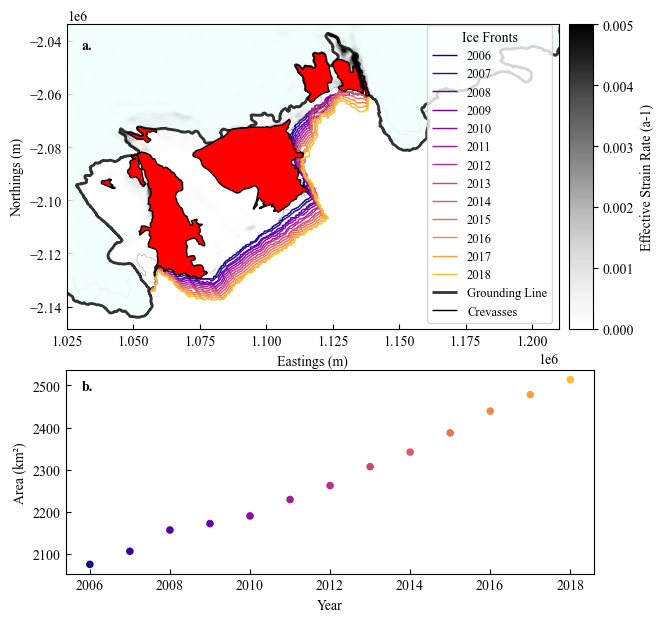

In [224]:
fig, axes = plt.subplots(2, 1, figsize=(160/25.4, 160/25.4), gridspec_kw={'height_ratios': [3,2]})

ax0 = axes[0]
vel_mean = np.ma.masked_invalid(vel_mean)
solid_cmap = ListedColormap(['white'])

first_img_plot = ax0.imshow(eff_strain, cmap='Greys', extent=extent, origin='upper', vmin=0, vmax=0.005)

ice_front_2006.plot(ax=ax0, edgecolor=area_colour_dict[2006], facecolor='none', linewidth=1, label='2006')
ice_front_2007.plot(ax=ax0, edgecolor=area_colour_dict[2007], facecolor='none', linewidth=1, label='2007')
ice_front_2008.plot(ax=ax0, edgecolor=area_colour_dict[2008], facecolor='none', linewidth=1, label='2008')
ice_front_2009.plot(ax=ax0, edgecolor=area_colour_dict[2009], facecolor='none', linewidth=1, label='2009')
ice_front_2010.plot(ax=ax0, edgecolor=area_colour_dict[2010], facecolor='none', linewidth=1, label='2010')
ice_front_2011.plot(ax=ax0, edgecolor=area_colour_dict[2011], facecolor='none', linewidth=1, label='2011')
ice_front_2012.plot(ax=ax0, edgecolor=area_colour_dict[2012], facecolor='none', linewidth=1, label='2012')
ice_front_2013.plot(ax=ax0, edgecolor=area_colour_dict[2013], facecolor='none', linewidth=1, label='2013')
ice_front_2014.plot(ax=ax0, edgecolor=area_colour_dict[2014], facecolor='none', linewidth=1, label='2014')
ice_front_2015.plot(ax=ax0, edgecolor=area_colour_dict[2015], facecolor='none', linewidth=1, label='2015')
ice_front_2016.plot(ax=ax0, edgecolor=area_colour_dict[2016], facecolor='none', linewidth=1, label='2016')
ice_front_2017.plot(ax=ax0, edgecolor=area_colour_dict[2017], facecolor='none', linewidth=1, label='2017')
ice_front_2018.plot(ax=ax0, edgecolor=area_colour_dict[2018], facecolor='none', linewidth=1, label='2018')

groundingline.plot(ax=ax0, edgecolor='black', facecolor='azure', linewidth=2, label='Grounding Line', alpha=0.8)
current_crevasses.plot(ax=ax0, edgecolor='black', facecolor='red', linewidth=1, label='Crevasses')




divider0 = make_axes_locatable(ax0)
cax0 = divider0.append_axes("right", size="5%", pad=0.1)
cbar0 = fig.colorbar(first_img_plot, cax=cax0)
for label in cbar0.ax.get_yticklabels():
    label.set_fontname('Times New Roman')
    label.set_fontsize(10)
cbar0.set_label("Effective Strain Rate (a-1)", fontsize=10, fontfamily='Times New Roman')

ax0.set_xlabel('Eastings (m)', fontsize=10, fontfamily='Times New Roman')
ax0.set_ylabel('Northings (m)', fontsize=10, fontfamily='Times New Roman')
for label in (ax0.get_xticklabels() + ax0.get_yticklabels()):
    label.set_fontsize(10)
    label.set_family('Times New Roman')
ax0.xaxis.get_offset_text().set_fontname('Times New Roman')
ax0.xaxis.get_offset_text().set_fontsize(10)
ax0.yaxis.get_offset_text().set_fontname('Times New Roman')
ax0.yaxis.get_offset_text().set_fontsize(10)
ax0.tick_params(direction='in')
ax0.set_xlim(xlimit2)
ax0.set_ylim(ylimit2)
ax0.set_aspect('equal')

legend = ax0.legend(loc='lower right', frameon=True, prop={'size': 9, 'family': 'Times New Roman'}, title='Ice Fronts', title_fontsize=10)
legend.get_frame().set_linewidth(1)
legend.get_title().set_fontsize(10)
legend.get_title().set_fontfamily('Times New Roman')



#########################################################


ax1 = axes[1]
n = len(area_year) + 2
cmap = cm.get_cmap('plasma', n)
area_colour_dict = {year: cmap(i / (n - 1)) for i, year in enumerate(sorted(set(area_year)))}
area_colours = [area_colour_dict[year] for year in area_year]
second_plot = ax1.scatter(area_year, area, c=area_colours, s=20)
ax1.set_xlabel('Year', fontsize=10, fontfamily='Times New Roman')
ax1.set_ylabel('Area (km²)', fontsize=10, fontfamily='Times New Roman')  
# ax1.set_ylim(2000, 2500)  
# ax1.set_xlim(2006, 2018) 
for label in (ax1.get_xticklabels() + ax1.get_yticklabels()):
    label.set_fontsize(10)
    label.set_family('Times New Roman')
ax1.xaxis.get_offset_text().set_fontname('Times New Roman')
ax1.xaxis.get_offset_text().set_fontsize(10)
ax1.yaxis.get_offset_text().set_fontname('Times New Roman')
ax1.yaxis.get_offset_text().set_fontsize(10)
ax1.tick_params(direction='in')

#########################################################
ax0.text(0.03, 0.95, "a.", transform=ax0.transAxes, fontsize=10, fontname = 'Times New Roman', fontweight='bold', va='top', ha='left')
ax1.text(0.03, 0.95, "b.", transform=ax1.transAxes, fontsize=10, fontname = 'Times New Roman', fontweight='bold', va='top', ha='left')

plt.tight_layout(pad=0.1, h_pad=0.2)
#plt.savefig('figure_1_proper.jpg', dpi=500, bbox_inches='tight')
plt.show()

C:\Users\jjls0\AppData\Local\Temp\ipykernel_17900\1608949739.py:9: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('plasma', n)


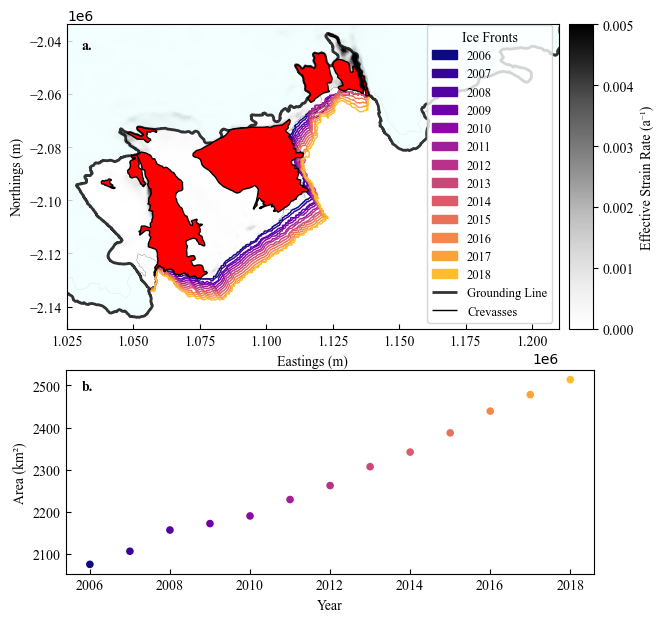

In [230]:
fig, axes = plt.subplots(2, 1, figsize=(160/25.4, 160/25.4), gridspec_kw={'height_ratios': [3,2]})

ax0 = axes[0]
vel_mean = np.ma.masked_invalid(vel_mean)
first_img_plot = ax0.imshow(eff_strain, cmap='Greys', extent=extent, origin='upper', vmin=0, vmax=0.005)

years = list(range(2006, 2019))
n = len(years) + 2
cmap = cm.get_cmap('plasma', n)
area_colour_dict = {year: cmap(i / (n - 1)) for i, year in enumerate(years)}

for year in years:
    gdf = globals().get(f'ice_front_{year}')  
    if gdf is not None:
        gdf.plot(ax=ax0, edgecolor=area_colour_dict[year], facecolor='none', linewidth=1)

groundingline.plot(ax=ax0, edgecolor='black', facecolor='azure', linewidth=2, label='Grounding Line', alpha=0.8)
current_crevasses.plot(ax=ax0, edgecolor='black', facecolor='red', linewidth=1, label='Crevasses')

divider0 = make_axes_locatable(ax0)
cax0 = divider0.append_axes("right", size="5%", pad=0.1)
cbar0 = fig.colorbar(first_img_plot, cax=cax0)
cbar0.set_label("Effective Strain Rate (a⁻¹)", fontsize=10, fontfamily='Times New Roman')
for label in cbar0.ax.get_yticklabels():
    label.set_fontname('Times New Roman')
    label.set_fontsize(10)

ax0.set_xlabel('Eastings (m)', fontsize=10, fontfamily='Times New Roman')
ax0.set_ylabel('Northings (m)', fontsize=10, fontfamily='Times New Roman')
for label in (ax0.get_xticklabels() + ax0.get_yticklabels()):
    label.set_fontsize(10)
    label.set_family('Times New Roman')
ax0.tick_params(direction='in')
ax0.set_xlim(xlimit2)
ax0.set_ylim(ylimit2)
ax0.set_aspect('equal')

legend_handles = [mpatches.Patch(color=area_colour_dict[year], label=str(year)) for year in years]
extra_handles, _ = ax0.get_legend_handles_labels()
legend_handles += extra_handles
legend = ax0.legend(handles=legend_handles, title='Ice Fronts', loc='lower right',
                    prop={'size': 9, 'family': 'Times New Roman'}, title_fontsize=10)
legend.get_frame().set_linewidth(1)
legend.get_title().set_fontfamily('Times New Roman')

#########################################################
ax1 = axes[1]
area_colours = [area_colour_dict[year] for year in area_year]
ax1.scatter(area_year, area, c=area_colours, s=20)
ax1.set_xlabel('Year', fontsize=10, fontfamily='Times New Roman')
ax1.set_ylabel('Area (km²)', fontsize=10, fontfamily='Times New Roman')
for label in (ax1.get_xticklabels() + ax1.get_yticklabels()):
    label.set_fontsize(10)
    label.set_family('Times New Roman')
ax1.tick_params(direction='in')

#########################################################
ax0.text(0.03, 0.95, "a.", transform=ax0.transAxes, fontsize=10, fontname = 'Times New Roman', fontweight='bold', va='top', ha='left')
ax1.text(0.03, 0.95, "b.", transform=ax1.transAxes, fontsize=10, fontname = 'Times New Roman', fontweight='bold', va='top', ha='left')

plt.tight_layout(pad=0.1, h_pad=0.2)
#plt.savefig('figure_1_proper.jpg', dpi=500, bbox_inches='tight')
plt.show()

# CREVASSE vulnerability estimation:

### NOT NORMALISED: probability distribution function EXAMPLE FOR 2009

In [ ]:
import geopandas as gpd
import rasterio
import rasterio.mask
import numpy as np
import matplotlib.pyplot as plt
from shapely.geometry import mapping
from scipy.stats import gaussian_kde

In [314]:
crevasses = gpd.read_file("TEST_POLYGON_crevasses_identified.shp")

# Open strain rate GeoTIFF
with rasterio.open("TEST_eff_strain_2009.tif") as src:
    strain_data = src.read(1)  # first band
    strain_data = strain_data.astype(float)
    strain_data[strain_data == src.nodata] = np.nan  
    strain_data[strain_data == 0.0] = np.nan ###############
    affine = src.transform

# Extract strain rates at crevasse locations
crevasse_geoms = [mapping(geom) for geom in crevasses.geometry]

with rasterio.open("TEST_eff_strain_2009.tif") as src:
    crevasse_masked, _ = rasterio.mask.mask(src, crevasse_geoms, crop=False)
    crevasse_strain = crevasse_masked[0].astype(float)
    crevasse_strain[crevasse_strain == src.nodata] = np.nan
    crevasse_strain[crevasse_strain == 0.0] = np.nan ###############

all_strain = strain_data[~np.isnan(strain_data)].flatten()
crev_strain = crevasse_strain[~np.isnan(crevasse_strain)].flatten()

In [298]:

# KDE for smooth probability density
kde_all = gaussian_kde(all_strain)
kde_crev = gaussian_kde(crev_strain)

x_vals = np.linspace(0, max(all_strain.max(), crev_strain.max()), 500)
pdf_all = kde_all(x_vals)
pdf_crev = kde_crev(x_vals)

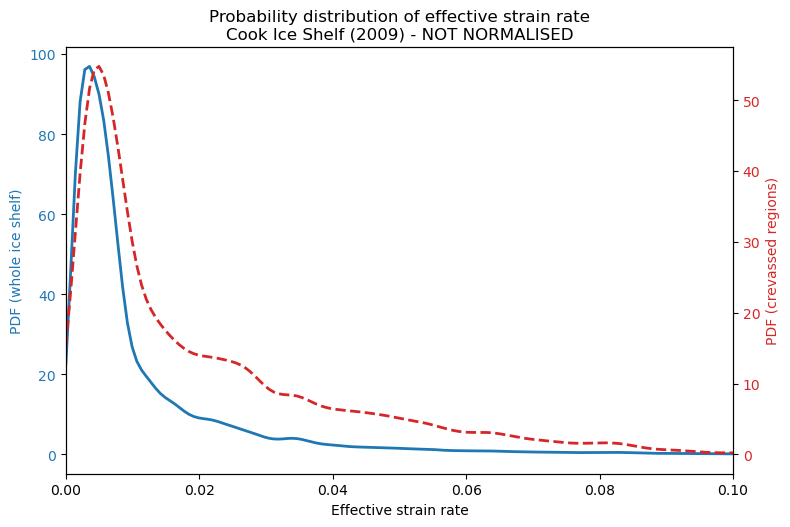

In [308]:

fig, ax1 = plt.subplots(figsize=(8,5))

color1 = 'tab:blue'
ax1.set_xlabel("Effective strain rate")
ax1.set_ylabel("PDF (whole ice shelf)", color=color1)
ax1.plot(x_vals, pdf_all, color=color1, lw=2, label="All ice shelf")
ax1.set_xlim(0, 0.1)
ax1.tick_params(axis='y', labelcolor=color1)

# Second axis for crevassed regions
ax2 = ax1.twinx()
color2 = 'tab:red'
ax2.set_ylabel("PDF (crevassed regions)", color=color2)
ax2.plot(x_vals, pdf_crev, color=color2, lw=2, linestyle="--", label="Crevassed")
ax2.tick_params(axis='y', labelcolor=color2)

fig.tight_layout()
plt.title("Probability distribution of effective strain rate\nCook Ice Shelf (2009) - NOT NORMALISED")
plt.show()


### Histogram

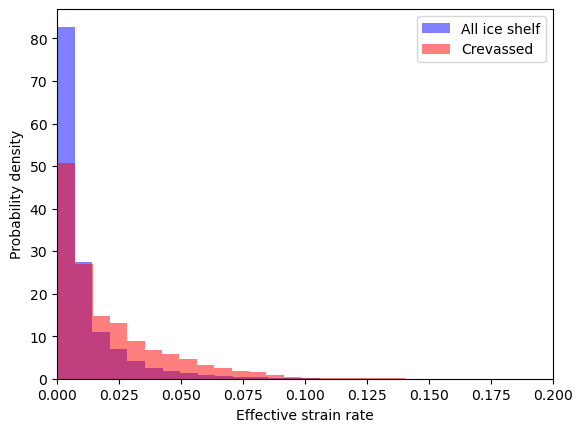

In [343]:
import matplotlib.pyplot as plt

plt.hist(all_strain, bins=50, density=True, alpha=0.5, label="All ice shelf", color="blue")
plt.hist(crev_strain, bins=50, density=True, alpha=0.5, label="Crevassed", color="red")
plt.xlabel("Effective strain rate")
plt.ylabel("Probability density")
plt.xlim(0, 0.2)
plt.legend()
plt.show()


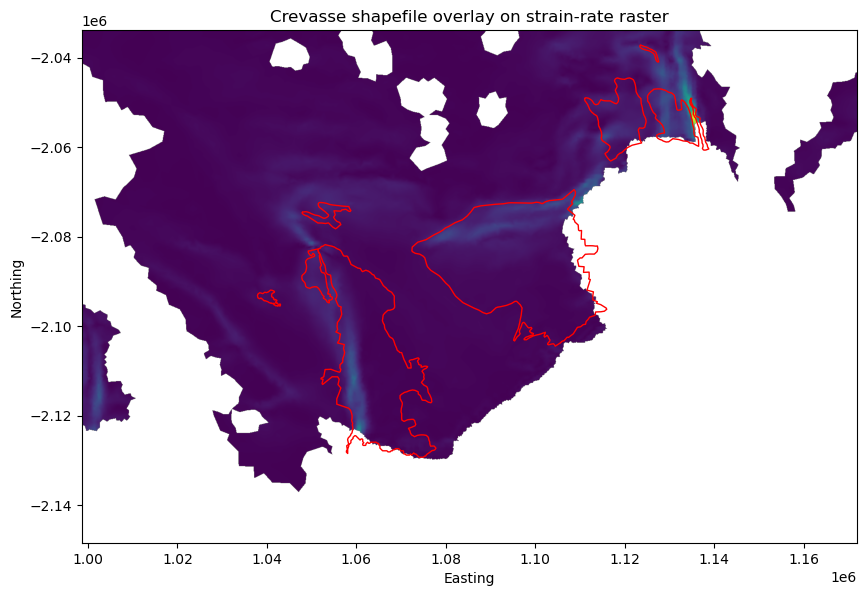

In [272]:
import geopandas as gpd
import rasterio
import matplotlib.pyplot as plt
from rasterio.plot import show

# ------------------------
# Load shapefile and raster
# ------------------------
crevasses = gpd.read_file("TEST_POLYGON_crevasses_identified.shp")

with rasterio.open("TEST_eff_strain_2009.tif") as src:
    strain_data = src.read(1)
    strain_data = strain_data.astype(float)
    strain_data[strain_data == src.nodata] = None
    extent = [src.bounds.left, src.bounds.right, src.bounds.bottom, src.bounds.top]

# ------------------------
# Plot raster + crevasse polygons
# ------------------------
fig, ax = plt.subplots(figsize=(10, 8))

# Plot raster in grayscale
plt.imshow(strain_data, cmap="viridis", extent=extent, origin="upper")

# Overlay crevasse polygons/lines
crevasses.boundary.plot(ax=ax, edgecolor="red", linewidth=1)

# If polygons, you can also fill them instead of just boundaries:
# crevasses.plot(ax=ax, facecolor="none", edgecolor="red")

ax.set_title("Crevasse shapefile overlay on strain-rate raster")
ax.set_xlabel("Easting")
ax.set_ylabel("Northing")
plt.show()


### NORMALISED:

In [327]:
import geopandas as gpd
import rasterio
import rasterio.mask
import numpy as np
import matplotlib.pyplot as plt
from shapely.geometry import mapping
from scipy.stats import gaussian_kde

In [329]:
crevasses = gpd.read_file("TEST_POLYGON_crevasses_identified.shp")

# Open strain rate GeoTIFF
with rasterio.open("TEST_eff_strain_2009.tif") as src:
    strain_data = src.read(1)  # first band
    strain_data = strain_data.astype(float)
    strain_data[strain_data == src.nodata] = np.nan  
    strain_data[strain_data == 0.0] = np.nan ###############
    affine = src.transform

# Extract strain rates at crevasse locations
crevasse_geoms = [mapping(geom) for geom in crevasses.geometry]

with rasterio.open("TEST_eff_strain_2009.tif") as src:
    crevasse_masked, _ = rasterio.mask.mask(src, crevasse_geoms, crop=False)
    crevasse_strain = crevasse_masked[0].astype(float)
    crevasse_strain[crevasse_strain == src.nodata] = np.nan
    crevasse_strain[crevasse_strain == 0.0] = np.nan ###############

all_strain = strain_data[~np.isnan(strain_data)].flatten()
crev_strain = crevasse_strain[~np.isnan(crevasse_strain)].flatten()

In [331]:
# KDE for smooth probability density
kde_all = gaussian_kde(all_strain)
kde_crev = gaussian_kde(crev_strain)

x_vals = np.linspace(0, max(all_strain.max(), crev_strain.max()), 500)

# Evaluate KDE
pdf_all = kde_all(x_vals)
pdf_crev = kde_crev(x_vals)

# Normalize so area under curve = 1
dx = x_vals[1] - x_vals[0]
pdf_all /= np.sum(pdf_all * dx)
pdf_crev /= np.sum(pdf_crev * dx)

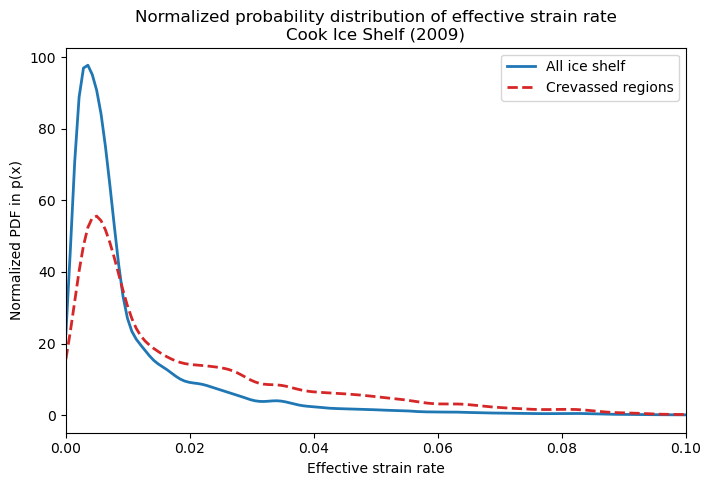

In [333]:
fig, ax = plt.subplots(figsize=(8,5))
ax.plot(x_vals, pdf_all, color='tab:blue', lw=2, label="All ice shelf")
ax.plot(x_vals, pdf_crev, color='tab:red', lw=2, linestyle="--", label="Crevassed regions")
ax.set_xlabel("Effective strain rate")
ax.set_ylabel("Normalized PDF in p(x)")
ax.set_xlim(0, 0.1)
ax.legend()
plt.title("Normalized probability distribution of effective strain rate\nCook Ice Shelf (2009)")
plt.show()


What does the above graph mean?   
 - the peak around 0.002 at 95 on the Y-axis means that the PDF has its highest density here
 - this means that the peak at 95 means that strain rates around 0.002 are the most frequent / dominate the distribution

What does the Y axis mean?
 - it does NOT represent the probability directly
 - instead, it gives me the relative likelihood (density) of finding a pixel with a given strain rate
 - EXAMPLE: If 95% of the blue curve’s area lies below ~0.002 (1/yr), that means 95% of the ice shelf pixels have strain rates ≤ 0.002 per year.

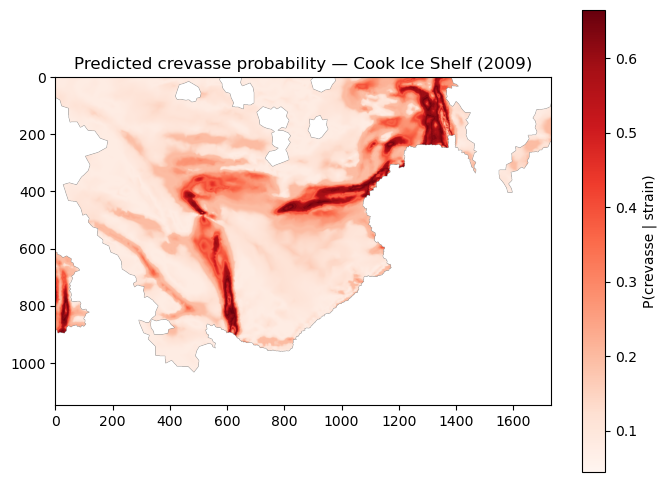

In [366]:
## THIS IS CONDITIONAL PROBABILITY: THE PROBABILITY OF 'A' HAPPENING, GIVEN THAT 'B" HAS ALREADY OCCURRED

# ------------------------
# Load data
# ------------------------
crevasses = gpd.read_file("TEST_POLYGON_crevasses_identified.shp")

with rasterio.open("TEST_eff_strain_2009.tif") as src:
    strain_data = src.read(1).astype(float)
    strain_data[strain_data == src.nodata] = np.nan
    strain_data[strain_data == 0.0] = np.nan  # optional: mask zero strain
    affine = src.transform

# Extract strain rates at crevasse locations
crev_geoms = [mapping(geom) for geom in crevasses.geometry]
with rasterio.open("TEST_eff_strain_2009.tif") as src:
    crev_masked, _ = mask.mask(src, crev_geoms, crop=False)
    crev_strain = crev_masked[0].astype(float)
    crev_strain[crev_strain == src.nodata] = np.nan
    crev_strain[crev_strain == 0.0] = np.nan

# Flatten arrays
all_strain = strain_data[~np.isnan(strain_data)].flatten()
crev_strain = crev_strain[~np.isnan(crev_strain)].flatten()

# ------------------------
# KDE for smooth PDFs
# ------------------------
kde_all = gaussian_kde(all_strain)
kde_crev = gaussian_kde(crev_strain)

x_vals = np.linspace(0, max(all_strain.max(), crev_strain.max()), 500)

pdf_all = kde_all(x_vals)
pdf_crev = kde_crev(x_vals)

dx = x_vals[1] - x_vals[0]
pdf_all /= np.sum(pdf_all * dx)
pdf_crev /= np.sum(pdf_crev * dx)

# ------------------------
# Prevalence of crevasses
# ------------------------
P_crev = len(crev_strain) / len(all_strain)  # fraction of pixels that are crevasses

# ------------------------
# Conditional probability function
# ------------------------
pdf_all_safe = np.copy(pdf_all)
pdf_all_safe[pdf_all_safe == 0] = 1e-10

# Now include prevalence to get P(crevasse | strain)
prob_func = interp1d(x_vals, (pdf_crev / pdf_all_safe) * P_crev,
                     bounds_error=False, fill_value=0.0)

# ------------------------
# Apply to raster
# ------------------------
prob_raster = prob_func(strain_data)
prob_raster[np.isnan(strain_data)] = np.nan

# Clip probabilities to 0-1 just in case
prob_raster = np.clip(prob_raster, 0, 1)

# ------------------------
# Save probability map
# ------------------------
out_meta = src.meta.copy()
out_meta.update({"dtype": "float32", "count": 1, "nodata": np.nan})

with rasterio.open("probability_crevasse.tif", "w", **out_meta) as dst:
    dst.write(prob_raster.astype(np.float32), 1)

# ------------------------
# Plot probability map
# ------------------------
plt.figure(figsize=(8,6))
plt.imshow(prob_raster, cmap="Reds", origin="upper")
plt.colorbar(label="P(crevasse | strain)")
plt.title("Predicted crevasse probability — Cook Ice Shelf (2009)")
plt.show()


Explanation of plot above:
 - this plot represents the conditional probability of a crevasse occurring GIVEN the local strain rate at each pixel
 - the colourbar units is probability (UNITLESS) e.g. a 0.7 means 70% change of crevassing at that location

### EXAMPLE: USE THIS !!!

requires:
 - polygon shapefile outlining current crevasses (depends on satellite imagery)
 - effective strain rate geotiff for specific year ( depends on MATLAB code, having troubles exporting ISSM eff function )

In [16]:
import geopandas as gpd
import rasterio
import rasterio.mask
import numpy as np
import matplotlib.pyplot as plt
from shapely.geometry import mapping
from scipy.stats import gaussian_kde
from scipy.interpolate import interp1d
from matplotlib import rcParams


In [24]:
crevasses = gpd.read_file("TEST_POLYGON_crevasses_identified.shp")    # note to self: CHANGE THIS INPUT AS NEEDED

with rasterio.open("TEST_eff_strain_2009.tif") as src:    # note to self: CHANGE THIS INPUT AS NEEDED
    strain_data = src.read(1)  
    strain_data = strain_data.astype(float)
    strain_data[strain_data == src.nodata] = np.nan  
    strain_data[strain_data == 0.0] = np.nan 
    affine = src.transform

# Extract strain rates at crevasse locations
crevasse_geoms = [mapping(geom) for geom in crevasses.geometry]

with rasterio.open("TEST_eff_strain_2009.tif") as src:    # note to self: CHANGE THIS INPUT AS NEEDED
    crevasse_masked, _ = rasterio.mask.mask(src, crevasse_geoms, crop=False)
    crevasse_strain = crevasse_masked[0].astype(float)
    crevasse_strain[crevasse_strain == src.nodata] = np.nan
    crevasse_strain[crevasse_strain == 0.0] = np.nan 

all_strain = strain_data[~np.isnan(strain_data)].flatten()
crev_strain = crevasse_strain[~np.isnan(crevasse_strain)].flatten()

In [26]:
# KDE = gaussian (smoothed) kernal density estimation - SAME AS PDF
kde_all = gaussian_kde(all_strain) # this line estimates the prob. density of all strain values across the ice shelf
kde_crev = gaussian_kde(crev_strain) # this line estimates the density of strain values for the CREVASSED regions

x_vals = np.linspace(0, max(all_strain.max(), crev_strain.max()), 500) # 500 bins. Higher value = smoother graph

# Evaluate KDE at each 'x' point
pdf_all = kde_all(x_vals)
pdf_crev = kde_crev(x_vals)

# Normalise so area under curve = 1
dx = x_vals[1] - x_vals[0]
pdf_all /= np.sum(pdf_all * dx)
pdf_crev /= np.sum(pdf_crev * dx)

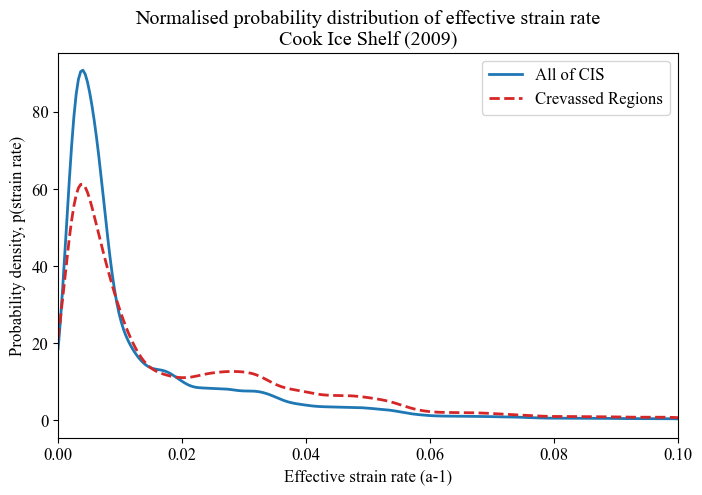

In [470]:
rcParams['font.family'] = 'Times New Roman'
rcParams['font.size'] = 12
fig, ax = plt.subplots(figsize=(8,5))
ax.plot(x_vals, pdf_all, color='tab:blue', lw=2, label="All of CIS")
ax.plot(x_vals, pdf_crev, color='tab:red', lw=2, linestyle="--", label="Crevassed Regions")
ax.set_xlabel("Effective strain rate (a-1)")
ax.set_ylabel("Probability density, p(strain rate)")
ax.set_xlim(0, 0.1)
ax.legend()
plt.title("Normalised probability distribution of effective strain rate\nCook Ice Shelf (2009)")
plt.show()

In [472]:
## THIS IS CONDITIONAL PROBABILITY: THE PROBABILITY OF 'A' HAPPENING, GIVEN THAT 'B' HAS ALREADY OCCURRED

P_crev = len(crev_strain) / len(all_strain)  # fraction of pixels that are crevasses

# data prepping
pdf_all_safe = np.copy(pdf_all)
pdf_all_safe[pdf_all_safe == 0] = 1e-10

# CALCULATES the CONDITIONAL PROBABILITY
prob_func = interp1d(x_vals, (pdf_crev / pdf_all_safe) * P_crev, bounds_error=False, fill_value=0.0)

# Preps data for a new raster, and calculates the conditional probability at every pixel in this original strain raster
prob_raster = prob_func(strain_data)
prob_raster[np.isnan(strain_data)] = np.nan
# prob_raster = np.clip(prob_raster, 0, 1)
out_meta = src.meta.copy()
out_meta.update({"dtype": "float32", "count": 1, "nodata": np.nan})
with rasterio.open("probability_crevasse_2009.tif", "w", **out_meta) as dst:    # note to self: CHANGE THIS OUTPUT NAME AS NEEDED
    dst.write(prob_raster.astype(np.float32), 1)


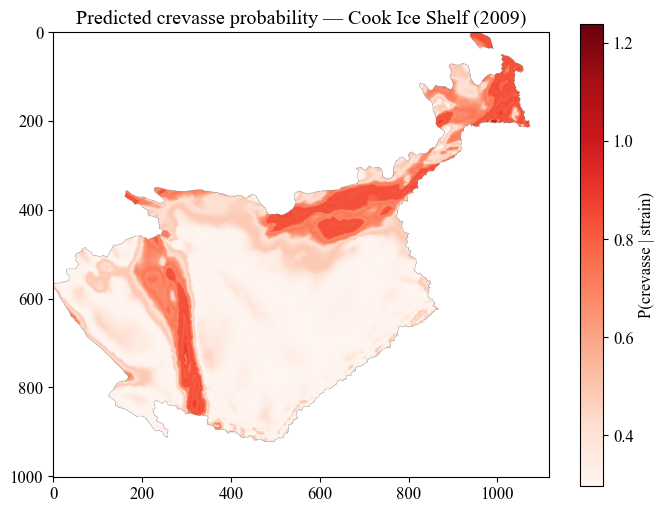

In [474]:
plt.figure(figsize=(8,6))
plt.imshow(prob_raster, cmap="Reds", origin="upper")
plt.colorbar(label="P(crevasse | strain)")
plt.title("Predicted crevasse probability — Cook Ice Shelf (2009)")
plt.show()

### 2006 example

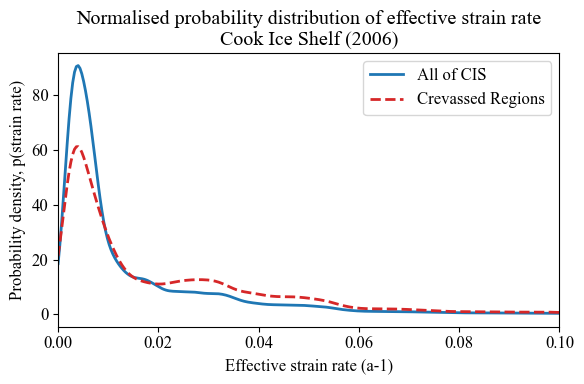

In [524]:
crevasses = gpd.read_file("TEST_POLYGON_crevasses_identified.shp")    # note to self: CHANGE THIS INPUT AS NEEDED

with rasterio.open("eff_2006.tif") as src: ##############################################################################################################################
    strain_data = src.read(1)  
    strain_data = strain_data.astype(float)
    strain_data[strain_data == src.nodata] = np.nan  
    strain_data[strain_data == 0.0] = np.nan 
    affine = src.transform

# Extract strain rates at crevasse locations
crevasse_geoms = [mapping(geom) for geom in crevasses.geometry]

with rasterio.open("eff_2006.tif") as src:  ###############################################################################################################################
    crevasse_masked, _ = rasterio.mask.mask(src, crevasse_geoms, crop=False)
    crevasse_strain = crevasse_masked[0].astype(float)
    crevasse_strain[crevasse_strain == src.nodata] = np.nan
    crevasse_strain[crevasse_strain == 0.0] = np.nan 

all_strain = strain_data[~np.isnan(strain_data)].flatten()
crev_strain = crevasse_strain[~np.isnan(crevasse_strain)].flatten()

# KDE = gaussian (smoothed) kernal density estimation - SAME AS PDF
kde_all = gaussian_kde(all_strain) # this line estimates the prob. density of all strain values across the ice shelf
kde_crev = gaussian_kde(crev_strain) # this line estimates the density of strain values for the CREVASSED regions

x_vals = np.linspace(0, max(all_strain.max(), crev_strain.max()), 500) # 500 bins. Higher value = smoother graph

# Evaluate KDE at each 'x' point
pdf_all = kde_all(x_vals)
pdf_crev = kde_crev(x_vals)

# Normalise so area under curve = 1
dx = x_vals[1] - x_vals[0]
pdf_all /= np.sum(pdf_all * dx)
pdf_crev /= np.sum(pdf_crev * dx)

rcParams['font.family'] = 'Times New Roman'
rcParams['font.size'] = 12
fig, ax = plt.subplots(figsize=(6,4))
ax.plot(x_vals, pdf_all, color='tab:blue', lw=2, label="All of CIS")
ax.plot(x_vals, pdf_crev, color='tab:red', lw=2, linestyle="--", label="Crevassed Regions")
ax.set_xlabel("Effective strain rate (a-1)")
ax.set_ylabel("Probability density, p(strain rate)")
ax.set_xlim(0, 0.1)
ax.legend()
plt.title("Normalised probability distribution of effective strain rate\nCook Ice Shelf (2006)") #####################################################################################
plt.tight_layout()
plt.savefig('2006_PDF.jpg', dpi=500, bbox_inches='tight') ###################################################################################################################
plt.show()

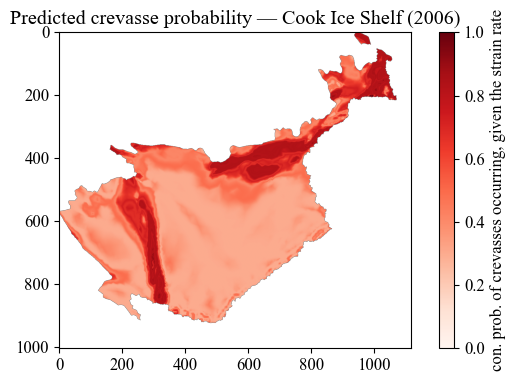

In [526]:
## THIS IS CONDITIONAL PROBABILITY: THE PROBABILITY OF 'A' HAPPENING, GIVEN THAT 'B' HAS ALREADY OCCURRED

P_crev = len(crev_strain) / len(all_strain)  # fraction of pixels that are crevasses

# data prepping
pdf_all_safe = np.copy(pdf_all)
pdf_all_safe[pdf_all_safe == 0] = 1e-10

# CALCULATES the CONDITIONAL PROBABILITY
prob_func = interp1d(x_vals, (pdf_crev / pdf_all_safe) * P_crev, bounds_error=False, fill_value=0.0)

# Preps data for a new raster, and calculates the conditional probability at every pixel in this original strain raster
prob_raster = prob_func(strain_data)
prob_raster[np.isnan(strain_data)] = np.nan

plt.figure(figsize=(6,4))
plt.imshow(prob_raster, cmap="Reds", origin="upper", vmin = 0, vmax=1)
plt.colorbar(label="con. prob. of crevasses occurring, given the strain rate")
plt.title("Predicted crevasse probability — Cook Ice Shelf (2006)") ###################################################################################################################
plt.tight_layout()
plt.savefig('2006_map.jpg', dpi=500, bbox_inches='tight') ###################################################################################################################
plt.show()

### 2008

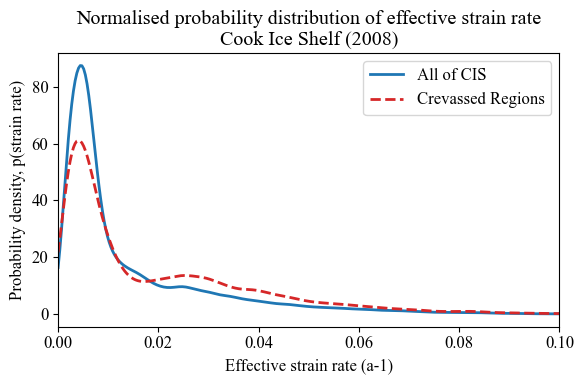

In [532]:
crevasses = gpd.read_file("TEST_POLYGON_crevasses_identified.shp")    # note to self: CHANGE THIS INPUT AS NEEDED

with rasterio.open("eff_2008.tif") as src: ##############################################################################################################################
    strain_data = src.read(1)  
    strain_data = strain_data.astype(float)
    strain_data[strain_data == src.nodata] = np.nan  
    strain_data[strain_data == 0.0] = np.nan 
    affine = src.transform

# Extract strain rates at crevasse locations
crevasse_geoms = [mapping(geom) for geom in crevasses.geometry]

with rasterio.open("eff_2008.tif") as src:  ###############################################################################################################################
    crevasse_masked, _ = rasterio.mask.mask(src, crevasse_geoms, crop=False)
    crevasse_strain = crevasse_masked[0].astype(float)
    crevasse_strain[crevasse_strain == src.nodata] = np.nan
    crevasse_strain[crevasse_strain == 0.0] = np.nan 

all_strain = strain_data[~np.isnan(strain_data)].flatten()
crev_strain = crevasse_strain[~np.isnan(crevasse_strain)].flatten()

# KDE = gaussian (smoothed) kernal density estimation - SAME AS PDF
kde_all = gaussian_kde(all_strain) # this line estimates the prob. density of all strain values across the ice shelf
kde_crev = gaussian_kde(crev_strain) # this line estimates the density of strain values for the CREVASSED regions

x_vals = np.linspace(0, max(all_strain.max(), crev_strain.max()), 500) # 500 bins. Higher value = smoother graph

# Evaluate KDE at each 'x' point
pdf_all = kde_all(x_vals)
pdf_crev = kde_crev(x_vals)

# Normalise so area under curve = 1
dx = x_vals[1] - x_vals[0]
pdf_all /= np.sum(pdf_all * dx)
pdf_crev /= np.sum(pdf_crev * dx)

rcParams['font.family'] = 'Times New Roman'
rcParams['font.size'] = 12
fig, ax = plt.subplots(figsize=(6,4))
ax.plot(x_vals, pdf_all, color='tab:blue', lw=2, label="All of CIS")
ax.plot(x_vals, pdf_crev, color='tab:red', lw=2, linestyle="--", label="Crevassed Regions")
ax.set_xlabel("Effective strain rate (a-1)")
ax.set_ylabel("Probability density, p(strain rate)")
ax.set_xlim(0, 0.1)
ax.legend()
plt.title("Normalised probability distribution of effective strain rate\nCook Ice Shelf (2008)") #####################################################################################
plt.tight_layout()
plt.savefig('2008_PDF.jpg', dpi=500, bbox_inches='tight') ###################################################################################################################
plt.show()

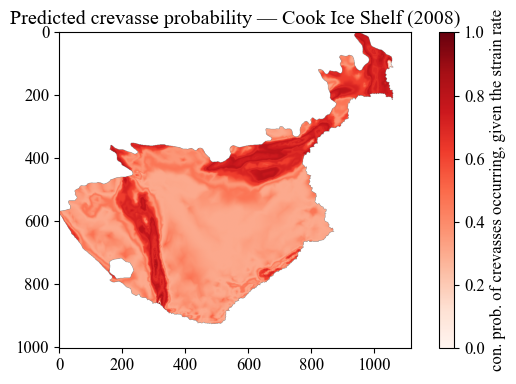

In [533]:
## THIS IS CONDITIONAL PROBABILITY: THE PROBABILITY OF 'A' HAPPENING, GIVEN THAT 'B' HAS ALREADY OCCURRED

P_crev = len(crev_strain) / len(all_strain)  # fraction of pixels that are crevasses

# data prepping
pdf_all_safe = np.copy(pdf_all)
pdf_all_safe[pdf_all_safe == 0] = 1e-10

# CALCULATES the CONDITIONAL PROBABILITY
prob_func = interp1d(x_vals, (pdf_crev / pdf_all_safe) * P_crev, bounds_error=False, fill_value=0.0)

# Preps data for a new raster, and calculates the conditional probability at every pixel in this original strain raster
prob_raster = prob_func(strain_data)
prob_raster[np.isnan(strain_data)] = np.nan

plt.figure(figsize=(6,4))
plt.imshow(prob_raster, cmap="Reds", origin="upper", vmin = 0, vmax=1)
plt.colorbar(label="con. prob. of crevasses occurring, given the strain rate")
plt.title("Predicted crevasse probability — Cook Ice Shelf (2008)") ###################################################################################################################
plt.tight_layout()
plt.savefig('2008_map.jpg', dpi=500, bbox_inches='tight') ###################################################################################################################
plt.show()

### 2009

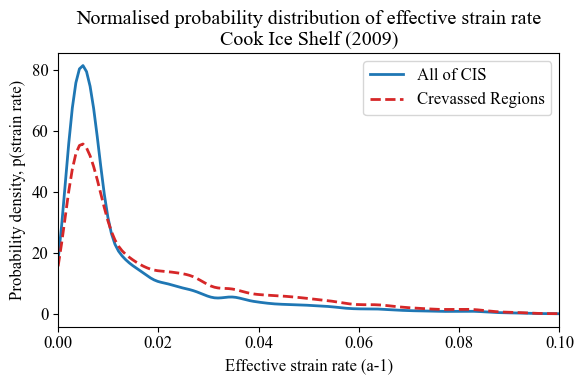

In [536]:
crevasses = gpd.read_file("TEST_POLYGON_crevasses_identified.shp")    # note to self: CHANGE THIS INPUT AS NEEDED

with rasterio.open("eff_2009.tif") as src: ##############################################################################################################################
    strain_data = src.read(1)  
    strain_data = strain_data.astype(float)
    strain_data[strain_data == src.nodata] = np.nan  
    strain_data[strain_data == 0.0] = np.nan 
    affine = src.transform

# Extract strain rates at crevasse locations
crevasse_geoms = [mapping(geom) for geom in crevasses.geometry]

with rasterio.open("eff_2009.tif") as src:  ###############################################################################################################################
    crevasse_masked, _ = rasterio.mask.mask(src, crevasse_geoms, crop=False)
    crevasse_strain = crevasse_masked[0].astype(float)
    crevasse_strain[crevasse_strain == src.nodata] = np.nan
    crevasse_strain[crevasse_strain == 0.0] = np.nan 

all_strain = strain_data[~np.isnan(strain_data)].flatten()
crev_strain = crevasse_strain[~np.isnan(crevasse_strain)].flatten()

# KDE = gaussian (smoothed) kernal density estimation - SAME AS PDF
kde_all = gaussian_kde(all_strain) # this line estimates the prob. density of all strain values across the ice shelf
kde_crev = gaussian_kde(crev_strain) # this line estimates the density of strain values for the CREVASSED regions

x_vals = np.linspace(0, max(all_strain.max(), crev_strain.max()), 500) # 500 bins. Higher value = smoother graph

# Evaluate KDE at each 'x' point
pdf_all = kde_all(x_vals)
pdf_crev = kde_crev(x_vals)

# Normalise so area under curve = 1
dx = x_vals[1] - x_vals[0]
pdf_all /= np.sum(pdf_all * dx)
pdf_crev /= np.sum(pdf_crev * dx)

rcParams['font.family'] = 'Times New Roman'
rcParams['font.size'] = 12
fig, ax = plt.subplots(figsize=(6,4))
ax.plot(x_vals, pdf_all, color='tab:blue', lw=2, label="All of CIS")
ax.plot(x_vals, pdf_crev, color='tab:red', lw=2, linestyle="--", label="Crevassed Regions")
ax.set_xlabel("Effective strain rate (a-1)")
ax.set_ylabel("Probability density, p(strain rate)")
ax.set_xlim(0, 0.1)
ax.legend()
plt.title("Normalised probability distribution of effective strain rate\nCook Ice Shelf (2009)") #####################################################################################
plt.tight_layout()
plt.savefig('2009_PDF.jpg', dpi=500, bbox_inches='tight') ###################################################################################################################
plt.show()

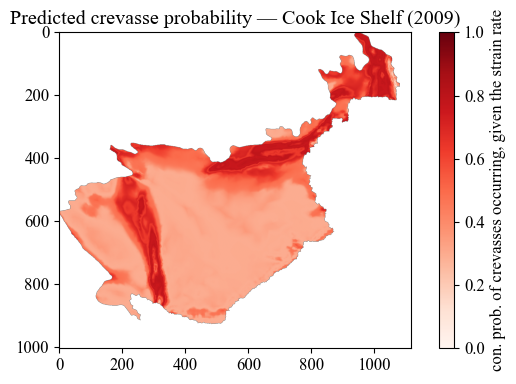

In [538]:
## THIS IS CONDITIONAL PROBABILITY: THE PROBABILITY OF 'A' HAPPENING, GIVEN THAT 'B' HAS ALREADY OCCURRED

P_crev = len(crev_strain) / len(all_strain)  # fraction of pixels that are crevasses

# data prepping
pdf_all_safe = np.copy(pdf_all)
pdf_all_safe[pdf_all_safe == 0] = 1e-10

# CALCULATES the CONDITIONAL PROBABILITY
prob_func = interp1d(x_vals, (pdf_crev / pdf_all_safe) * P_crev, bounds_error=False, fill_value=0.0)

# Preps data for a new raster, and calculates the conditional probability at every pixel in this original strain raster
prob_raster = prob_func(strain_data)
prob_raster[np.isnan(strain_data)] = np.nan

plt.figure(figsize=(6,4))
plt.imshow(prob_raster, cmap="Reds", origin="upper", vmin = 0, vmax=1)
plt.colorbar(label="con. prob. of crevasses occurring, given the strain rate")
plt.title("Predicted crevasse probability — Cook Ice Shelf (2009)") ###################################################################################################################
plt.tight_layout()
plt.savefig('2009_map.jpg', dpi=500, bbox_inches='tight') ###################################################################################################################
plt.show()

### 2010

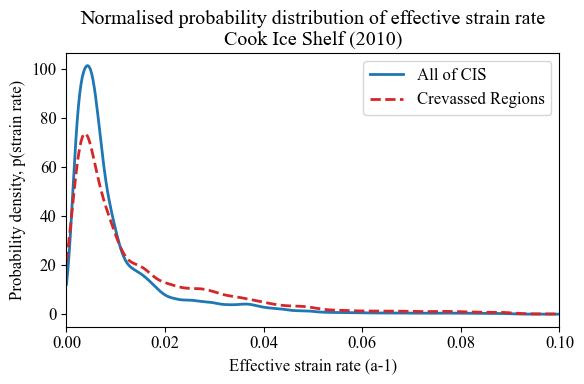

In [540]:
crevasses = gpd.read_file("TEST_POLYGON_crevasses_identified.shp")    # note to self: CHANGE THIS INPUT AS NEEDED

with rasterio.open("eff_2010.tif") as src: ##############################################################################################################################
    strain_data = src.read(1)  
    strain_data = strain_data.astype(float)
    strain_data[strain_data == src.nodata] = np.nan  
    strain_data[strain_data == 0.0] = np.nan 
    affine = src.transform

# Extract strain rates at crevasse locations
crevasse_geoms = [mapping(geom) for geom in crevasses.geometry]

with rasterio.open("eff_2010.tif") as src:  ###############################################################################################################################
    crevasse_masked, _ = rasterio.mask.mask(src, crevasse_geoms, crop=False)
    crevasse_strain = crevasse_masked[0].astype(float)
    crevasse_strain[crevasse_strain == src.nodata] = np.nan
    crevasse_strain[crevasse_strain == 0.0] = np.nan 

all_strain = strain_data[~np.isnan(strain_data)].flatten()
crev_strain = crevasse_strain[~np.isnan(crevasse_strain)].flatten()

# KDE = gaussian (smoothed) kernal density estimation - SAME AS PDF
kde_all = gaussian_kde(all_strain) # this line estimates the prob. density of all strain values across the ice shelf
kde_crev = gaussian_kde(crev_strain) # this line estimates the density of strain values for the CREVASSED regions

x_vals = np.linspace(0, max(all_strain.max(), crev_strain.max()), 500) # 500 bins. Higher value = smoother graph

# Evaluate KDE at each 'x' point
pdf_all = kde_all(x_vals)
pdf_crev = kde_crev(x_vals)

# Normalise so area under curve = 1
dx = x_vals[1] - x_vals[0]
pdf_all /= np.sum(pdf_all * dx)
pdf_crev /= np.sum(pdf_crev * dx)

rcParams['font.family'] = 'Times New Roman'
rcParams['font.size'] = 12
fig, ax = plt.subplots(figsize=(6,4))
ax.plot(x_vals, pdf_all, color='tab:blue', lw=2, label="All of CIS")
ax.plot(x_vals, pdf_crev, color='tab:red', lw=2, linestyle="--", label="Crevassed Regions")
ax.set_xlabel("Effective strain rate (a-1)")
ax.set_ylabel("Probability density, p(strain rate)")
ax.set_xlim(0, 0.1)
ax.legend()
plt.title("Normalised probability distribution of effective strain rate\nCook Ice Shelf (2010)") #####################################################################################
plt.tight_layout()
plt.savefig('2010_PDF.jpg', dpi=500, bbox_inches='tight') ###################################################################################################################
plt.show()

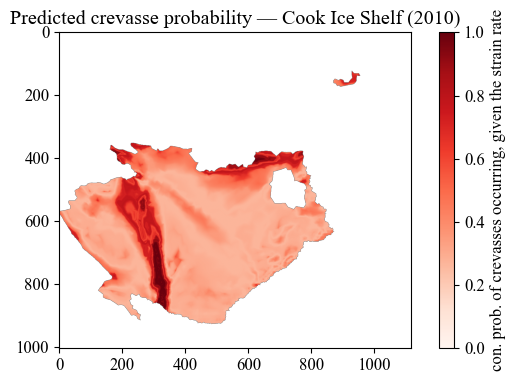

In [541]:
## THIS IS CONDITIONAL PROBABILITY: THE PROBABILITY OF 'A' HAPPENING, GIVEN THAT 'B' HAS ALREADY OCCURRED

P_crev = len(crev_strain) / len(all_strain)  # fraction of pixels that are crevasses

# data prepping
pdf_all_safe = np.copy(pdf_all)
pdf_all_safe[pdf_all_safe == 0] = 1e-10

# CALCULATES the CONDITIONAL PROBABILITY
prob_func = interp1d(x_vals, (pdf_crev / pdf_all_safe) * P_crev, bounds_error=False, fill_value=0.0)

# Preps data for a new raster, and calculates the conditional probability at every pixel in this original strain raster
prob_raster = prob_func(strain_data)
prob_raster[np.isnan(strain_data)] = np.nan

plt.figure(figsize=(6,4))
plt.imshow(prob_raster, cmap="Reds", origin="upper", vmin = 0, vmax=1)
plt.colorbar(label="con. prob. of crevasses occurring, given the strain rate")
plt.title("Predicted crevasse probability — Cook Ice Shelf (2010)") ###################################################################################################################
plt.tight_layout()
plt.savefig('2010_map.jpg', dpi=500, bbox_inches='tight') ###################################################################################################################
plt.show()

### 2011

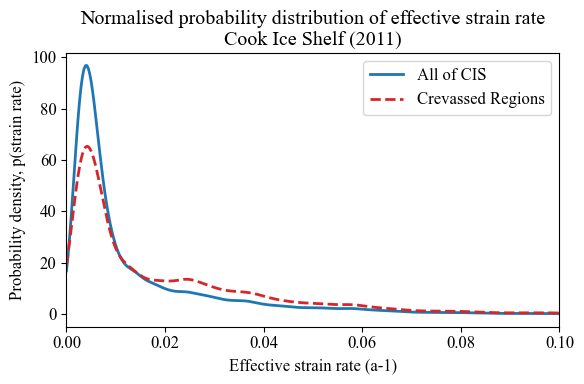

In [544]:
crevasses = gpd.read_file("TEST_POLYGON_crevasses_identified.shp")    # note to self: CHANGE THIS INPUT AS NEEDED

with rasterio.open("eff_2011.tif") as src: ##############################################################################################################################
    strain_data = src.read(1)  
    strain_data = strain_data.astype(float)
    strain_data[strain_data == src.nodata] = np.nan  
    strain_data[strain_data == 0.0] = np.nan 
    affine = src.transform

# Extract strain rates at crevasse locations
crevasse_geoms = [mapping(geom) for geom in crevasses.geometry]

with rasterio.open("eff_2011.tif") as src:  ###############################################################################################################################
    crevasse_masked, _ = rasterio.mask.mask(src, crevasse_geoms, crop=False)
    crevasse_strain = crevasse_masked[0].astype(float)
    crevasse_strain[crevasse_strain == src.nodata] = np.nan
    crevasse_strain[crevasse_strain == 0.0] = np.nan 

all_strain = strain_data[~np.isnan(strain_data)].flatten()
crev_strain = crevasse_strain[~np.isnan(crevasse_strain)].flatten()

# KDE = gaussian (smoothed) kernal density estimation - SAME AS PDF
kde_all = gaussian_kde(all_strain) # this line estimates the prob. density of all strain values across the ice shelf
kde_crev = gaussian_kde(crev_strain) # this line estimates the density of strain values for the CREVASSED regions

x_vals = np.linspace(0, max(all_strain.max(), crev_strain.max()), 500) # 500 bins. Higher value = smoother graph

# Evaluate KDE at each 'x' point
pdf_all = kde_all(x_vals)
pdf_crev = kde_crev(x_vals)

# Normalise so area under curve = 1
dx = x_vals[1] - x_vals[0]
pdf_all /= np.sum(pdf_all * dx)
pdf_crev /= np.sum(pdf_crev * dx)

rcParams['font.family'] = 'Times New Roman'
rcParams['font.size'] = 12
fig, ax = plt.subplots(figsize=(6,4))
ax.plot(x_vals, pdf_all, color='tab:blue', lw=2, label="All of CIS")
ax.plot(x_vals, pdf_crev, color='tab:red', lw=2, linestyle="--", label="Crevassed Regions")
ax.set_xlabel("Effective strain rate (a-1)")
ax.set_ylabel("Probability density, p(strain rate)")
ax.set_xlim(0, 0.1)
ax.legend()
plt.title("Normalised probability distribution of effective strain rate\nCook Ice Shelf (2011)") #####################################################################################
plt.tight_layout()
plt.savefig('2011_PDF.jpg', dpi=500, bbox_inches='tight') ###################################################################################################################
plt.show()

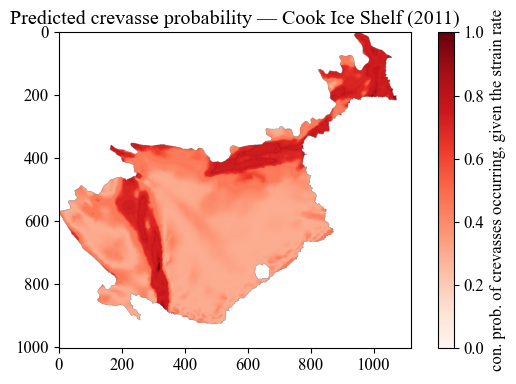

In [546]:
## THIS IS CONDITIONAL PROBABILITY: THE PROBABILITY OF 'A' HAPPENING, GIVEN THAT 'B' HAS ALREADY OCCURRED

P_crev = len(crev_strain) / len(all_strain)  # fraction of pixels that are crevasses

# data prepping
pdf_all_safe = np.copy(pdf_all)
pdf_all_safe[pdf_all_safe == 0] = 1e-10

# CALCULATES the CONDITIONAL PROBABILITY
prob_func = interp1d(x_vals, (pdf_crev / pdf_all_safe) * P_crev, bounds_error=False, fill_value=0.0)

# Preps data for a new raster, and calculates the conditional probability at every pixel in this original strain raster
prob_raster = prob_func(strain_data)
prob_raster[np.isnan(strain_data)] = np.nan

plt.figure(figsize=(6,4))
plt.imshow(prob_raster, cmap="Reds", origin="upper", vmin = 0, vmax=1)
plt.colorbar(label="con. prob. of crevasses occurring, given the strain rate")
plt.title("Predicted crevasse probability — Cook Ice Shelf (2011)") ###################################################################################################################
plt.tight_layout()
plt.savefig('2011_map.jpg', dpi=500, bbox_inches='tight') ###################################################################################################################
plt.show()

### 2014

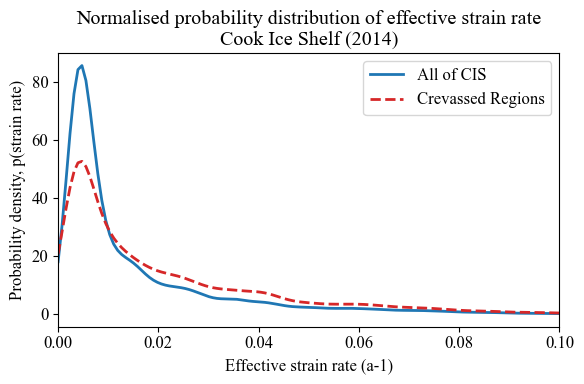

In [548]:
crevasses = gpd.read_file("TEST_POLYGON_crevasses_identified.shp")    # note to self: CHANGE THIS INPUT AS NEEDED

with rasterio.open("eff_2014.tif") as src: ##############################################################################################################################
    strain_data = src.read(1)  
    strain_data = strain_data.astype(float)
    strain_data[strain_data == src.nodata] = np.nan  
    strain_data[strain_data == 0.0] = np.nan 
    affine = src.transform

# Extract strain rates at crevasse locations
crevasse_geoms = [mapping(geom) for geom in crevasses.geometry]

with rasterio.open("eff_2014.tif") as src:  ###############################################################################################################################
    crevasse_masked, _ = rasterio.mask.mask(src, crevasse_geoms, crop=False)
    crevasse_strain = crevasse_masked[0].astype(float)
    crevasse_strain[crevasse_strain == src.nodata] = np.nan
    crevasse_strain[crevasse_strain == 0.0] = np.nan 

all_strain = strain_data[~np.isnan(strain_data)].flatten()
crev_strain = crevasse_strain[~np.isnan(crevasse_strain)].flatten()

# KDE = gaussian (smoothed) kernal density estimation - SAME AS PDF
kde_all = gaussian_kde(all_strain) # this line estimates the prob. density of all strain values across the ice shelf
kde_crev = gaussian_kde(crev_strain) # this line estimates the density of strain values for the CREVASSED regions

x_vals = np.linspace(0, max(all_strain.max(), crev_strain.max()), 500) # 500 bins. Higher value = smoother graph

# Evaluate KDE at each 'x' point
pdf_all = kde_all(x_vals)
pdf_crev = kde_crev(x_vals)

# Normalise so area under curve = 1
dx = x_vals[1] - x_vals[0]
pdf_all /= np.sum(pdf_all * dx)
pdf_crev /= np.sum(pdf_crev * dx)

rcParams['font.family'] = 'Times New Roman'
rcParams['font.size'] = 12
fig, ax = plt.subplots(figsize=(6,4))
ax.plot(x_vals, pdf_all, color='tab:blue', lw=2, label="All of CIS")
ax.plot(x_vals, pdf_crev, color='tab:red', lw=2, linestyle="--", label="Crevassed Regions")
ax.set_xlabel("Effective strain rate (a-1)")
ax.set_ylabel("Probability density, p(strain rate)")
ax.set_xlim(0, 0.1)
ax.legend()
plt.title("Normalised probability distribution of effective strain rate\nCook Ice Shelf (2014)") #####################################################################################
plt.tight_layout()
plt.savefig('2014_PDF.jpg', dpi=500, bbox_inches='tight') ###################################################################################################################
plt.show()

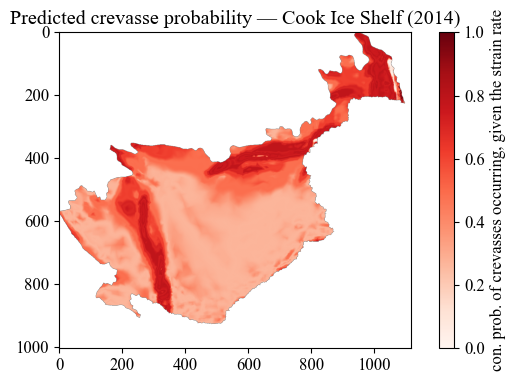

In [549]:
## THIS IS CONDITIONAL PROBABILITY: THE PROBABILITY OF 'A' HAPPENING, GIVEN THAT 'B' HAS ALREADY OCCURRED

P_crev = len(crev_strain) / len(all_strain)  # fraction of pixels that are crevasses

# data prepping
pdf_all_safe = np.copy(pdf_all)
pdf_all_safe[pdf_all_safe == 0] = 1e-10

# CALCULATES the CONDITIONAL PROBABILITY
prob_func = interp1d(x_vals, (pdf_crev / pdf_all_safe) * P_crev, bounds_error=False, fill_value=0.0)

# Preps data for a new raster, and calculates the conditional probability at every pixel in this original strain raster
prob_raster = prob_func(strain_data)
prob_raster[np.isnan(strain_data)] = np.nan

plt.figure(figsize=(6,4))
plt.imshow(prob_raster, cmap="Reds", origin="upper", vmin = 0, vmax=1)
plt.colorbar(label="con. prob. of crevasses occurring, given the strain rate")
plt.title("Predicted crevasse probability — Cook Ice Shelf (2014)") ###################################################################################################################
plt.tight_layout()
plt.savefig('2014_map.jpg', dpi=500, bbox_inches='tight') ###################################################################################################################
plt.show()

### 2015

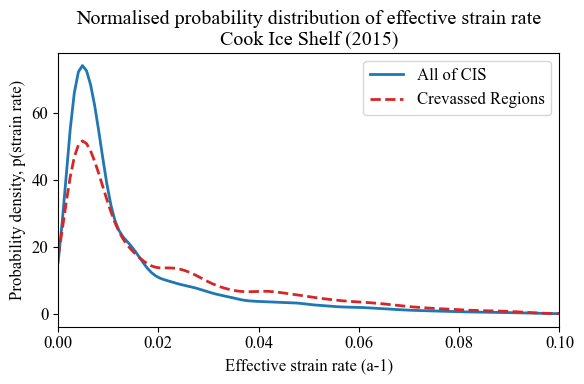

In [552]:
crevasses = gpd.read_file("TEST_POLYGON_crevasses_identified.shp")    # note to self: CHANGE THIS INPUT AS NEEDED

with rasterio.open("eff_2015.tif") as src: ##############################################################################################################################
    strain_data = src.read(1)  
    strain_data = strain_data.astype(float)
    strain_data[strain_data == src.nodata] = np.nan  
    strain_data[strain_data == 0.0] = np.nan 
    affine = src.transform

# Extract strain rates at crevasse locations
crevasse_geoms = [mapping(geom) for geom in crevasses.geometry]

with rasterio.open("eff_2015.tif") as src:  ###############################################################################################################################
    crevasse_masked, _ = rasterio.mask.mask(src, crevasse_geoms, crop=False)
    crevasse_strain = crevasse_masked[0].astype(float)
    crevasse_strain[crevasse_strain == src.nodata] = np.nan
    crevasse_strain[crevasse_strain == 0.0] = np.nan 

all_strain = strain_data[~np.isnan(strain_data)].flatten()
crev_strain = crevasse_strain[~np.isnan(crevasse_strain)].flatten()

# KDE = gaussian (smoothed) kernal density estimation - SAME AS PDF
kde_all = gaussian_kde(all_strain) # this line estimates the prob. density of all strain values across the ice shelf
kde_crev = gaussian_kde(crev_strain) # this line estimates the density of strain values for the CREVASSED regions

x_vals = np.linspace(0, max(all_strain.max(), crev_strain.max()), 500) # 500 bins. Higher value = smoother graph

# Evaluate KDE at each 'x' point
pdf_all = kde_all(x_vals)
pdf_crev = kde_crev(x_vals)

# Normalise so area under curve = 1
dx = x_vals[1] - x_vals[0]
pdf_all /= np.sum(pdf_all * dx)
pdf_crev /= np.sum(pdf_crev * dx)

rcParams['font.family'] = 'Times New Roman'
rcParams['font.size'] = 12
fig, ax = plt.subplots(figsize=(6,4))
ax.plot(x_vals, pdf_all, color='tab:blue', lw=2, label="All of CIS")
ax.plot(x_vals, pdf_crev, color='tab:red', lw=2, linestyle="--", label="Crevassed Regions")
ax.set_xlabel("Effective strain rate (a-1)")
ax.set_ylabel("Probability density, p(strain rate)")
ax.set_xlim(0, 0.1)
ax.legend()
plt.title("Normalised probability distribution of effective strain rate\nCook Ice Shelf (2015)") #####################################################################################
plt.tight_layout()
plt.savefig('2015_PDF.jpg', dpi=500, bbox_inches='tight') ###################################################################################################################
plt.show()

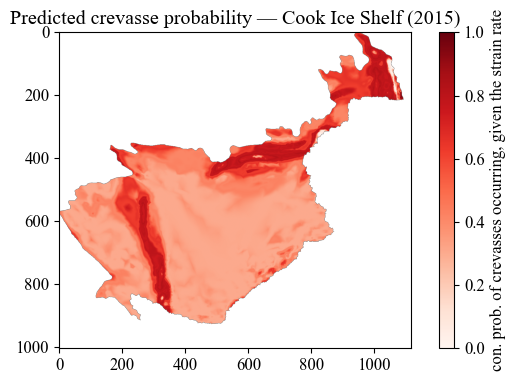

In [553]:
## THIS IS CONDITIONAL PROBABILITY: THE PROBABILITY OF 'A' HAPPENING, GIVEN THAT 'B' HAS ALREADY OCCURRED

P_crev = len(crev_strain) / len(all_strain)  # fraction of pixels that are crevasses

# data prepping
pdf_all_safe = np.copy(pdf_all)
pdf_all_safe[pdf_all_safe == 0] = 1e-10

# CALCULATES the CONDITIONAL PROBABILITY
prob_func = interp1d(x_vals, (pdf_crev / pdf_all_safe) * P_crev, bounds_error=False, fill_value=0.0)

# Preps data for a new raster, and calculates the conditional probability at every pixel in this original strain raster
prob_raster = prob_func(strain_data)
prob_raster[np.isnan(strain_data)] = np.nan

plt.figure(figsize=(6,4))
plt.imshow(prob_raster, cmap="Reds", origin="upper", vmin = 0, vmax=1)
plt.colorbar(label="con. prob. of crevasses occurring, given the strain rate")
plt.title("Predicted crevasse probability — Cook Ice Shelf (2015)") ###################################################################################################################
plt.tight_layout()
plt.savefig('2015_map.jpg', dpi=500, bbox_inches='tight') ###################################################################################################################
plt.show()

### 2016

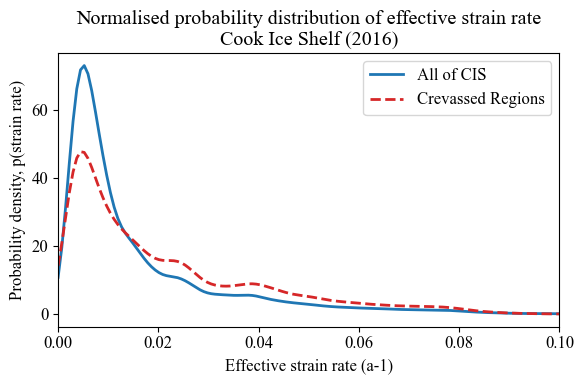

In [556]:
crevasses = gpd.read_file("TEST_POLYGON_crevasses_identified.shp")    # note to self: CHANGE THIS INPUT AS NEEDED

with rasterio.open("eff_2016.tif") as src: ##############################################################################################################################
    strain_data = src.read(1)  
    strain_data = strain_data.astype(float)
    strain_data[strain_data == src.nodata] = np.nan  
    strain_data[strain_data == 0.0] = np.nan 
    affine = src.transform

# Extract strain rates at crevasse locations
crevasse_geoms = [mapping(geom) for geom in crevasses.geometry]

with rasterio.open("eff_2016.tif") as src:  ###############################################################################################################################
    crevasse_masked, _ = rasterio.mask.mask(src, crevasse_geoms, crop=False)
    crevasse_strain = crevasse_masked[0].astype(float)
    crevasse_strain[crevasse_strain == src.nodata] = np.nan
    crevasse_strain[crevasse_strain == 0.0] = np.nan 

all_strain = strain_data[~np.isnan(strain_data)].flatten()
crev_strain = crevasse_strain[~np.isnan(crevasse_strain)].flatten()

# KDE = gaussian (smoothed) kernal density estimation - SAME AS PDF
kde_all = gaussian_kde(all_strain) # this line estimates the prob. density of all strain values across the ice shelf
kde_crev = gaussian_kde(crev_strain) # this line estimates the density of strain values for the CREVASSED regions

x_vals = np.linspace(0, max(all_strain.max(), crev_strain.max()), 500) # 500 bins. Higher value = smoother graph

# Evaluate KDE at each 'x' point
pdf_all = kde_all(x_vals)
pdf_crev = kde_crev(x_vals)

# Normalise so area under curve = 1
dx = x_vals[1] - x_vals[0]
pdf_all /= np.sum(pdf_all * dx)
pdf_crev /= np.sum(pdf_crev * dx)

rcParams['font.family'] = 'Times New Roman'
rcParams['font.size'] = 12
fig, ax = plt.subplots(figsize=(6,4))
ax.plot(x_vals, pdf_all, color='tab:blue', lw=2, label="All of CIS")
ax.plot(x_vals, pdf_crev, color='tab:red', lw=2, linestyle="--", label="Crevassed Regions")
ax.set_xlabel("Effective strain rate (a-1)")
ax.set_ylabel("Probability density, p(strain rate)")
ax.set_xlim(0, 0.1)
ax.legend()
plt.title("Normalised probability distribution of effective strain rate\nCook Ice Shelf (2016)") #####################################################################################
plt.tight_layout()
plt.savefig('2016_PDF.jpg', dpi=500, bbox_inches='tight') ###################################################################################################################
plt.show()

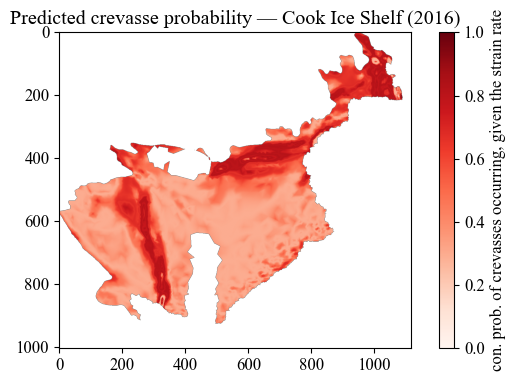

In [557]:
## THIS IS CONDITIONAL PROBABILITY: THE PROBABILITY OF 'A' HAPPENING, GIVEN THAT 'B' HAS ALREADY OCCURRED

P_crev = len(crev_strain) / len(all_strain)  # fraction of pixels that are crevasses

# data prepping
pdf_all_safe = np.copy(pdf_all)
pdf_all_safe[pdf_all_safe == 0] = 1e-10

# CALCULATES the CONDITIONAL PROBABILITY
prob_func = interp1d(x_vals, (pdf_crev / pdf_all_safe) * P_crev, bounds_error=False, fill_value=0.0)

# Preps data for a new raster, and calculates the conditional probability at every pixel in this original strain raster
prob_raster = prob_func(strain_data)
prob_raster[np.isnan(strain_data)] = np.nan

plt.figure(figsize=(6,4))
plt.imshow(prob_raster, cmap="Reds", origin="upper", vmin = 0, vmax=1)
plt.colorbar(label="con. prob. of crevasses occurring, given the strain rate")
plt.title("Predicted crevasse probability — Cook Ice Shelf (2016)") ###################################################################################################################
plt.tight_layout()
plt.savefig('2016_map.jpg', dpi=500, bbox_inches='tight') ###################################################################################################################
plt.show()

### 2017

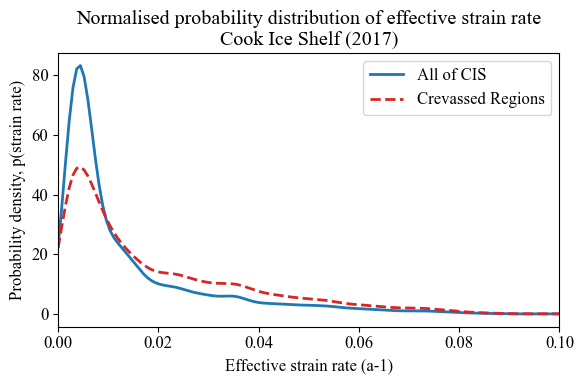

In [560]:
crevasses = gpd.read_file("TEST_POLYGON_crevasses_identified.shp")    # note to self: CHANGE THIS INPUT AS NEEDED

with rasterio.open("eff_2017.tif") as src: ##############################################################################################################################
    strain_data = src.read(1)  
    strain_data = strain_data.astype(float)
    strain_data[strain_data == src.nodata] = np.nan  
    strain_data[strain_data == 0.0] = np.nan 
    affine = src.transform

# Extract strain rates at crevasse locations
crevasse_geoms = [mapping(geom) for geom in crevasses.geometry]

with rasterio.open("eff_2017.tif") as src:  ###############################################################################################################################
    crevasse_masked, _ = rasterio.mask.mask(src, crevasse_geoms, crop=False)
    crevasse_strain = crevasse_masked[0].astype(float)
    crevasse_strain[crevasse_strain == src.nodata] = np.nan
    crevasse_strain[crevasse_strain == 0.0] = np.nan 

all_strain = strain_data[~np.isnan(strain_data)].flatten()
crev_strain = crevasse_strain[~np.isnan(crevasse_strain)].flatten()

# KDE = gaussian (smoothed) kernal density estimation - SAME AS PDF
kde_all = gaussian_kde(all_strain) # this line estimates the prob. density of all strain values across the ice shelf
kde_crev = gaussian_kde(crev_strain) # this line estimates the density of strain values for the CREVASSED regions

x_vals = np.linspace(0, max(all_strain.max(), crev_strain.max()), 500) # 500 bins. Higher value = smoother graph

# Evaluate KDE at each 'x' point
pdf_all = kde_all(x_vals)
pdf_crev = kde_crev(x_vals)

# Normalise so area under curve = 1
dx = x_vals[1] - x_vals[0]
pdf_all /= np.sum(pdf_all * dx)
pdf_crev /= np.sum(pdf_crev * dx)

rcParams['font.family'] = 'Times New Roman'
rcParams['font.size'] = 12
fig, ax = plt.subplots(figsize=(6,4))
ax.plot(x_vals, pdf_all, color='tab:blue', lw=2, label="All of CIS")
ax.plot(x_vals, pdf_crev, color='tab:red', lw=2, linestyle="--", label="Crevassed Regions")
ax.set_xlabel("Effective strain rate (a-1)")
ax.set_ylabel("Probability density, p(strain rate)")
ax.set_xlim(0, 0.1)
ax.legend()
plt.title("Normalised probability distribution of effective strain rate\nCook Ice Shelf (2017)") #####################################################################################
plt.tight_layout()
plt.savefig('2017_PDF.jpg', dpi=500, bbox_inches='tight') ###################################################################################################################
plt.show()

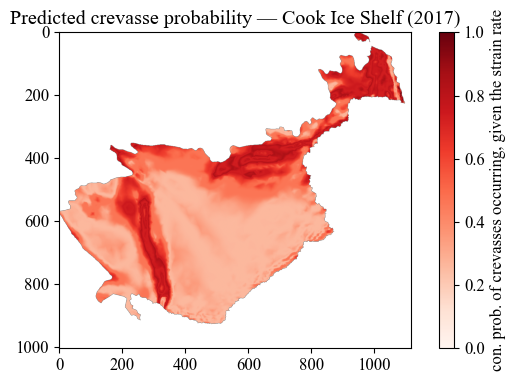

In [561]:
## THIS IS CONDITIONAL PROBABILITY: THE PROBABILITY OF 'A' HAPPENING, GIVEN THAT 'B' HAS ALREADY OCCURRED

P_crev = len(crev_strain) / len(all_strain)  # fraction of pixels that are crevasses

# data prepping
pdf_all_safe = np.copy(pdf_all)
pdf_all_safe[pdf_all_safe == 0] = 1e-10

# CALCULATES the CONDITIONAL PROBABILITY
prob_func = interp1d(x_vals, (pdf_crev / pdf_all_safe) * P_crev, bounds_error=False, fill_value=0.0)

# Preps data for a new raster, and calculates the conditional probability at every pixel in this original strain raster
prob_raster = prob_func(strain_data)
prob_raster[np.isnan(strain_data)] = np.nan

plt.figure(figsize=(6,4))
plt.imshow(prob_raster, cmap="Reds", origin="upper", vmin = 0, vmax=1)
plt.colorbar(label="con. prob. of crevasses occurring, given the strain rate")
plt.title("Predicted crevasse probability — Cook Ice Shelf (2017)") ###################################################################################################################
plt.tight_layout()
plt.savefig('2017_map.jpg', dpi=500, bbox_inches='tight') ###################################################################################################################
plt.show()

### 2018

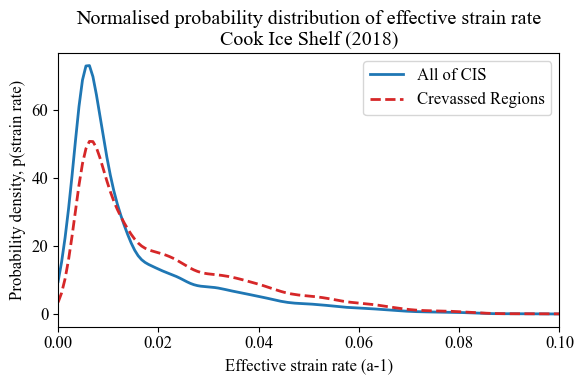

In [528]:
crevasses = gpd.read_file("TEST_POLYGON_crevasses_identified.shp")    # note to self: CHANGE THIS INPUT AS NEEDED

with rasterio.open("eff_2018.tif") as src: ##############################################################################################################################
    strain_data = src.read(1)  
    strain_data = strain_data.astype(float)
    strain_data[strain_data == src.nodata] = np.nan  
    strain_data[strain_data == 0.0] = np.nan 
    affine = src.transform

# Extract strain rates at crevasse locations
crevasse_geoms = [mapping(geom) for geom in crevasses.geometry]

with rasterio.open("eff_2018.tif") as src:  ###############################################################################################################################
    crevasse_masked, _ = rasterio.mask.mask(src, crevasse_geoms, crop=False)
    crevasse_strain = crevasse_masked[0].astype(float)
    crevasse_strain[crevasse_strain == src.nodata] = np.nan
    crevasse_strain[crevasse_strain == 0.0] = np.nan 

all_strain = strain_data[~np.isnan(strain_data)].flatten()
crev_strain = crevasse_strain[~np.isnan(crevasse_strain)].flatten()

# KDE = gaussian (smoothed) kernal density estimation - SAME AS PDF
kde_all = gaussian_kde(all_strain) # this line estimates the prob. density of all strain values across the ice shelf
kde_crev = gaussian_kde(crev_strain) # this line estimates the density of strain values for the CREVASSED regions

x_vals = np.linspace(0, max(all_strain.max(), crev_strain.max()), 500) # 500 bins. Higher value = smoother graph

# Evaluate KDE at each 'x' point
pdf_all = kde_all(x_vals)
pdf_crev = kde_crev(x_vals)

# Normalise so area under curve = 1
dx = x_vals[1] - x_vals[0]
pdf_all /= np.sum(pdf_all * dx)
pdf_crev /= np.sum(pdf_crev * dx)

rcParams['font.family'] = 'Times New Roman'
rcParams['font.size'] = 12
fig, ax = plt.subplots(figsize=(6,4))
ax.plot(x_vals, pdf_all, color='tab:blue', lw=2, label="All of CIS")
ax.plot(x_vals, pdf_crev, color='tab:red', lw=2, linestyle="--", label="Crevassed Regions")
ax.set_xlabel("Effective strain rate (a-1)")
ax.set_ylabel("Probability density, p(strain rate)")
ax.set_xlim(0, 0.1)
ax.legend()
plt.title("Normalised probability distribution of effective strain rate\nCook Ice Shelf (2018)") #####################################################################################
plt.tight_layout()
plt.savefig('2018_PDF.jpg', dpi=500, bbox_inches='tight') ###################################################################################################################
plt.show()

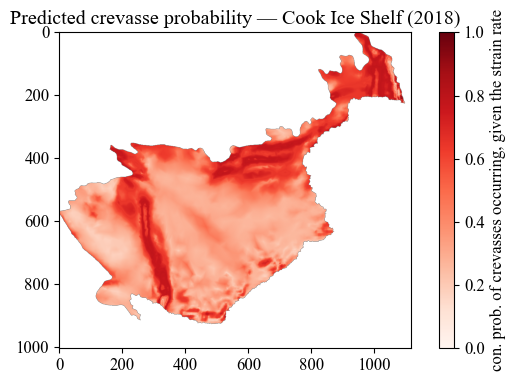

In [529]:
## THIS IS CONDITIONAL PROBABILITY: THE PROBABILITY OF 'A' HAPPENING, GIVEN THAT 'B' HAS ALREADY OCCURRED

P_crev = len(crev_strain) / len(all_strain)  # fraction of pixels that are crevasses

# data prepping
pdf_all_safe = np.copy(pdf_all)
pdf_all_safe[pdf_all_safe == 0] = 1e-10

# CALCULATES the CONDITIONAL PROBABILITY
prob_func = interp1d(x_vals, (pdf_crev / pdf_all_safe) * P_crev, bounds_error=False, fill_value=0.0)

# Preps data for a new raster, and calculates the conditional probability at every pixel in this original strain raster
prob_raster = prob_func(strain_data)
prob_raster[np.isnan(strain_data)] = np.nan

plt.figure(figsize=(6,4))
plt.imshow(prob_raster, cmap="Reds", origin="upper", vmin = 0, vmax=1)
plt.colorbar(label="con. prob. of crevasses occurring, given the strain rate")
plt.title("Predicted crevasse probability — Cook Ice Shelf (2018)") ###################################################################################################################
plt.tight_layout()
plt.savefig('2018_map.jpg', dpi=500, bbox_inches='tight') ###################################################################################################################
plt.show()

### Plotting them all together

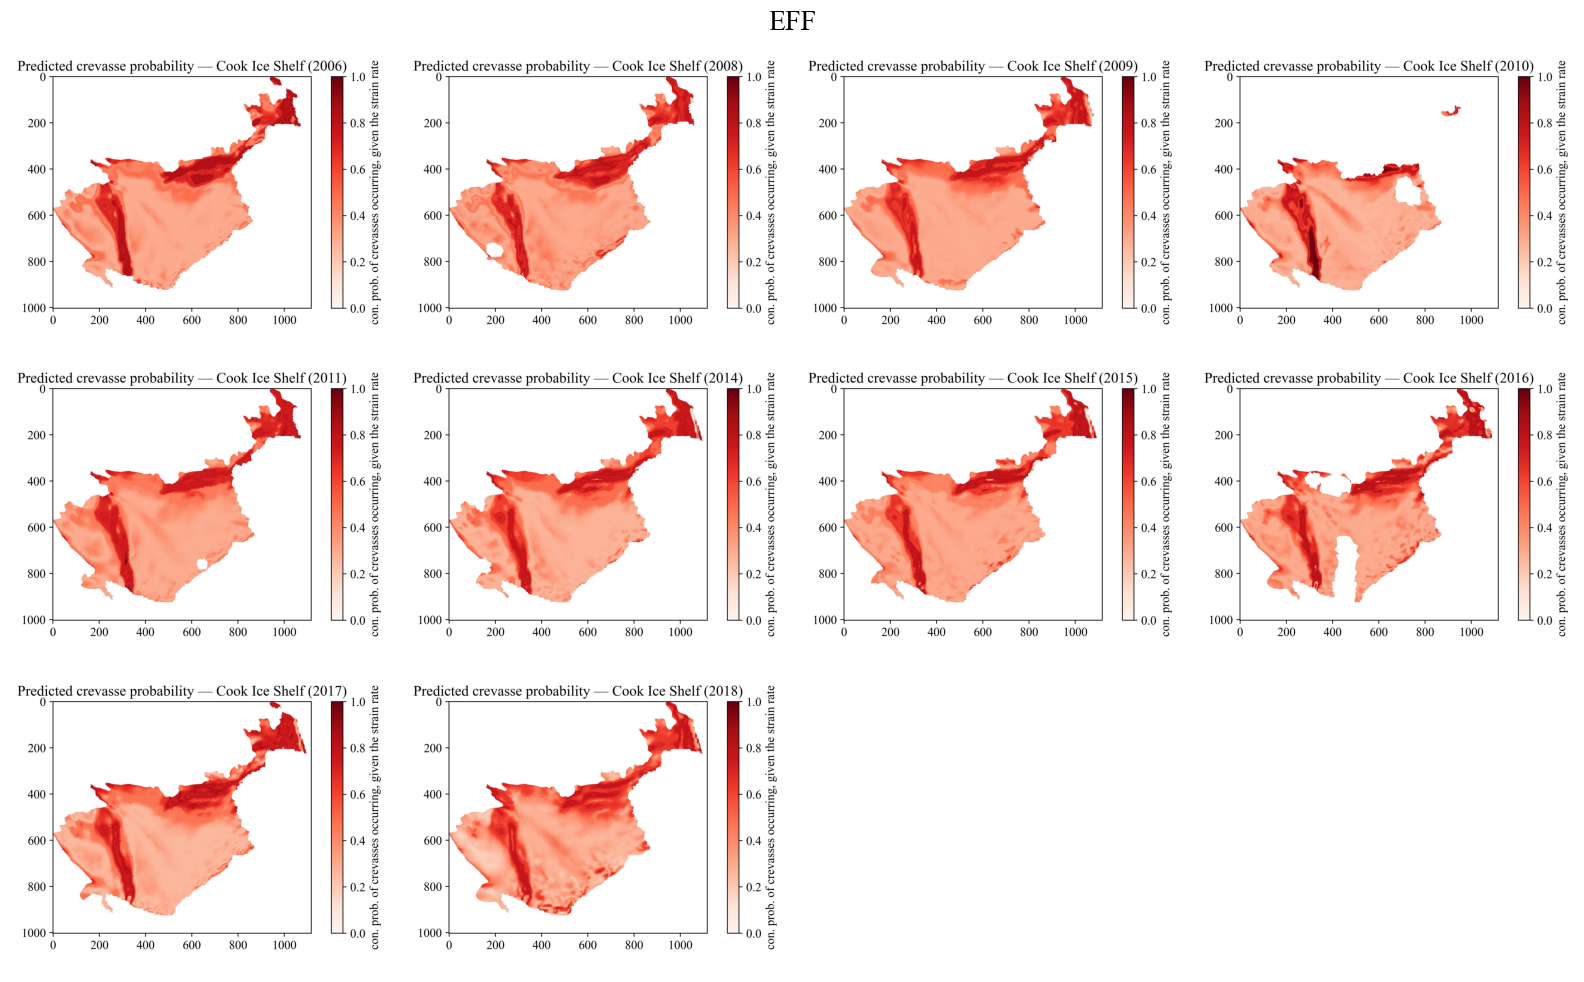

In [573]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

years = [2006, 2008, 2009, 2010, 2011, 2014, 2015, 2016, 2017, 2018]

# Build list of file paths
files = [fr"C:\Users\jjls0\OneDrive\Documents\MATLAB\forjeremy\Plots\2_EFF_own_calc\masked_Geotiffs\{yy}_map.jpg" for yy in years]

# Grid size (3 rows x 4 cols, like MATLAB)
nrows, ncols = 3, 4

fig, axes = plt.subplots(nrows, ncols, figsize=(16, 10), facecolor="w")

for ax, fname in zip(axes.flat, files):
    img = mpimg.imread(fname)
    ax.imshow(img)
    ax.axis("off")  # remove axes

# Hide unused subplots if fewer images than grid slots
for ax in axes.flat[len(files):]:
    ax.axis("off")

fig.suptitle("EFF", fontsize=20)

plt.tight_layout()
plt.subplots_adjust(top=0.95)  # leave space for title
plt.savefig(r"C:\Users\jjls0\OneDrive\Documents\MATLAB\forjeremy\Plots\2_EFF_own_calc\masked_Geotiffs\all_years_maps.png", dpi=300)
plt.show()


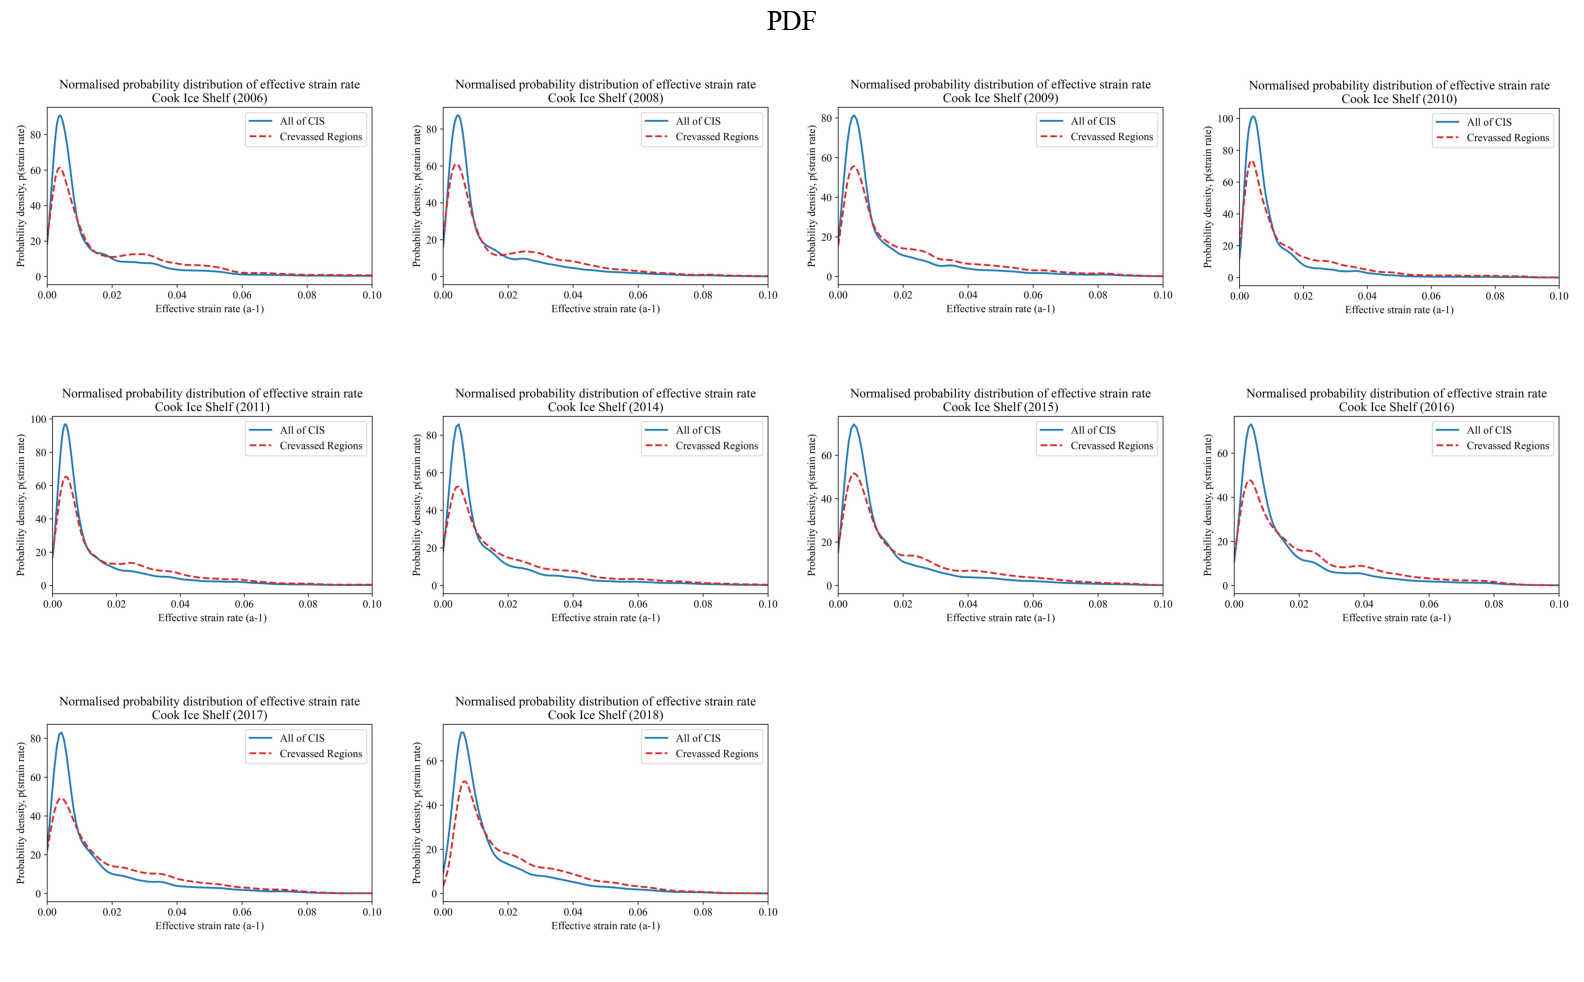

In [575]:
years = [2006, 2008, 2009, 2010, 2011, 2014, 2015, 2016, 2017, 2018]

# Build list of file paths
files = [fr"C:\Users\jjls0\OneDrive\Documents\MATLAB\forjeremy\Plots\2_EFF_own_calc\masked_Geotiffs\{yy}_PDF.jpg" for yy in years]

# Grid size (3 rows x 4 cols, like MATLAB)
nrows, ncols = 3, 4

fig, axes = plt.subplots(nrows, ncols, figsize=(16, 10), facecolor="w")

for ax, fname in zip(axes.flat, files):
    img = mpimg.imread(fname)
    ax.imshow(img)
    ax.axis("off")  # remove axes

# Hide unused subplots if fewer images than grid slots
for ax in axes.flat[len(files):]:
    ax.axis("off")

fig.suptitle("PDF", fontsize=20)

plt.tight_layout()
plt.subplots_adjust(top=0.95)  # leave space for title
plt.savefig(r"C:\Users\jjls0\OneDrive\Documents\MATLAB\forjeremy\Plots\2_EFF_own_calc\masked_Geotiffs\all_years_PDFs.png", dpi=300)
plt.show()

### MEAN

In [660]:
years = [2006, 2008, 2009, 2010, 2011, 2014, 2015, 2016, 2017, 2018]
arrays = []
meta = None

for year in years:
    filename = f"eff_{year}.tif"
    with rasterio.open(filename) as src:
        data = src.read(1).astype(float)
        data[data == src.nodata] = np.nan 
        arrays.append(data)
        if meta is None:
            meta = src.meta.copy()

stack = np.stack(arrays, axis=0)  
mean_arr = np.nanmean(stack, axis=0) 

meta.update(dtype="float32", count=1, nodata=np.nan)
with rasterio.open("eff_MEAN.tif", "w", **meta) as dst:
    dst.write(mean_arr.astype(np.float32), 1)


C:\Users\jjls0\AppData\Local\Temp\ipykernel_17900\2452774434.py:15: RuntimeWarning: Mean of empty slice
  mean_arr = np.nanmean(stack, axis=0)


In [662]:
crevasses = gpd.read_file("TEST_POLYGON_crevasses_identified.shp")    # note to self: CHANGE THIS INPUT AS NEEDED

with rasterio.open("eff_MEAN.tif") as src:    # note to self: CHANGE THIS INPUT AS NEEDED
    strain_data = src.read(1)  
    strain_data = strain_data.astype(float)
    strain_data[strain_data == src.nodata] = np.nan  
    strain_data[strain_data == 0.0] = np.nan 
    affine = src.transform

# Extract strain rates at crevasse locations
crevasse_geoms = [mapping(geom) for geom in crevasses.geometry]

with rasterio.open("eff_MEAN.tif") as src:    # note to self: CHANGE THIS INPUT AS NEEDED
    crevasse_masked, _ = rasterio.mask.mask(src, crevasse_geoms, crop=False)
    crevasse_strain = crevasse_masked[0].astype(float)
    crevasse_strain[crevasse_strain == src.nodata] = np.nan
    crevasse_strain[crevasse_strain == 0.0] = np.nan 

all_strain = strain_data[~np.isnan(strain_data)].flatten()
crev_strain = crevasse_strain[~np.isnan(crevasse_strain)].flatten()

In [664]:
# KDE = gaussian (smoothed) kernal density estimation - SAME AS PDF
kde_all = gaussian_kde(all_strain) # this line estimates the prob. density of all strain values across the ice shelf
kde_crev = gaussian_kde(crev_strain) # this line estimates the density of strain values for the CREVASSED regions

x_vals = np.linspace(0, max(all_strain.max(), crev_strain.max()), 500) # 500 bins. Higher value = smoother graph

# Evaluate KDE at each 'x' point
pdf_all = kde_all(x_vals)
pdf_crev = kde_crev(x_vals)

# Normalise so area under curve = 1
dx = x_vals[1] - x_vals[0]
pdf_all /= np.sum(pdf_all * dx)
pdf_crev /= np.sum(pdf_crev * dx)

In [666]:
## THIS IS CONDITIONAL PROBABILITY: THE PROBABILITY OF 'A' HAPPENING, GIVEN THAT 'B' HAS ALREADY OCCURRED

P_crev = len(crev_strain) / len(all_strain)  # fraction of pixels that are crevasses

# data prepping
pdf_all_safe = np.copy(pdf_all)
pdf_all_safe[pdf_all_safe == 0] = 1e-10

# CALCULATES the CONDITIONAL PROBABILITY
prob_func = interp1d(x_vals, (pdf_crev / pdf_all_safe) * P_crev, bounds_error=False, fill_value=0.0)

# Preps data for a new raster, and calculates the conditional probability at every pixel in this original strain raster
prob_raster = prob_func(strain_data)
prob_raster[np.isnan(strain_data)] = np.nan
# prob_raster = np.clip(prob_raster, 0, 1)
out_meta = src.meta.copy()
out_meta.update({"dtype": "float32", "count": 1, "nodata": np.nan})
with rasterio.open("mean_probability.tif", "w", **out_meta) as dst:    # note to self: CHANGE THIS OUTPUT NAME AS NEEDED
    dst.write(prob_raster.astype(np.float32), 1)


In [668]:
xlimit = (1025000, 1140000)
ylimit = (-2148431.9935, -2033743.9935)

xlimit2 = (1025000, 1210000)
ylimit2 = (-2148431.9935, -2033743.9935)

In [670]:
tif_path = "mean_probability.tif"
with rasterio.open(tif_path) as src:
    eff_strain = src.read(1)
    extent = [src.bounds.left, src.bounds.right, src.bounds.bottom, src.bounds.top]

groundingline = gpd.read_file('2003_GL_full_cook_complete_dissolved_larger.shp')
current_crevasses = gpd.read_file('crevasses_identified.shp')

ice_front_2006 = gpd.read_file(r'C:\Users\jjls0\OneDrive\Documents\HONOURS\PROGRAMS\zzResults_Figures\Crevassing_Calving\figure_1\ice_fronts\ice_front_2006.shp')
ice_front_2007 = gpd.read_file(r'C:\Users\jjls0\OneDrive\Documents\HONOURS\PROGRAMS\zzResults_Figures\Crevassing_Calving\figure_1\ice_fronts\ice_front_2007.shp')
ice_front_2008 = gpd.read_file(r'C:\Users\jjls0\OneDrive\Documents\HONOURS\PROGRAMS\zzResults_Figures\Crevassing_Calving\figure_1\ice_fronts\ice_front_2008.shp')
ice_front_2009 = gpd.read_file(r'C:\Users\jjls0\OneDrive\Documents\HONOURS\PROGRAMS\zzResults_Figures\Crevassing_Calving\figure_1\ice_fronts\ice_front_2009.shp')
ice_front_2010 = gpd.read_file(r'C:\Users\jjls0\OneDrive\Documents\HONOURS\PROGRAMS\zzResults_Figures\Crevassing_Calving\figure_1\ice_fronts\ice_front_2010.shp')
ice_front_2011 = gpd.read_file(r'C:\Users\jjls0\OneDrive\Documents\HONOURS\PROGRAMS\zzResults_Figures\Crevassing_Calving\figure_1\ice_fronts\ice_front_2011.shp')
ice_front_2012 = gpd.read_file(r'C:\Users\jjls0\OneDrive\Documents\HONOURS\PROGRAMS\zzResults_Figures\Crevassing_Calving\figure_1\ice_fronts\ice_front_2012.shp')
ice_front_2013 = gpd.read_file(r'C:\Users\jjls0\OneDrive\Documents\HONOURS\PROGRAMS\zzResults_Figures\Crevassing_Calving\figure_1\ice_fronts\ice_front_2013.shp')
ice_front_2014 = gpd.read_file(r'C:\Users\jjls0\OneDrive\Documents\HONOURS\PROGRAMS\zzResults_Figures\Crevassing_Calving\figure_1\ice_fronts\ice_front_2014.shp')
ice_front_2015 = gpd.read_file(r'C:\Users\jjls0\OneDrive\Documents\HONOURS\PROGRAMS\zzResults_Figures\Crevassing_Calving\figure_1\ice_fronts\ice_front_2015.shp')
ice_front_2016 = gpd.read_file(r'C:\Users\jjls0\OneDrive\Documents\HONOURS\PROGRAMS\zzResults_Figures\Crevassing_Calving\figure_1\ice_fronts\ice_front_2016.shp')
ice_front_2017 = gpd.read_file(r'C:\Users\jjls0\OneDrive\Documents\HONOURS\PROGRAMS\zzResults_Figures\Crevassing_Calving\figure_1\ice_fronts\ice_front_2017.shp')
ice_front_2018 = gpd.read_file(r'C:\Users\jjls0\OneDrive\Documents\HONOURS\PROGRAMS\zzResults_Figures\Crevassing_Calving\figure_1\ice_fronts\ice_front_2018.shp')


In [672]:
annual_area = pd.read_excel('annual_area.xlsx')
area_year = annual_area['Year']
area = annual_area['Annual_Area(km2)']

n = len(area_year) + 2
cmap = cm.get_cmap('plasma', n)
area_colour_dict = {year: cmap(i / (n - 1)) for i, year in enumerate(sorted(set(area_year)))}

C:\Users\jjls0\AppData\Local\Temp\ipykernel_17900\1099742362.py:6: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('plasma', n)


C:\Users\jjls0\AppData\Local\Temp\ipykernel_17900\20025367.py:9: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('plasma', n)
C:\Users\jjls0\AppData\Local\Temp\ipykernel_17900\20025367.py:44: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  crev_patch = mpatches.Patch(color='blue', label='Crevasses Present', alpha=0.3, edgecolor='black')


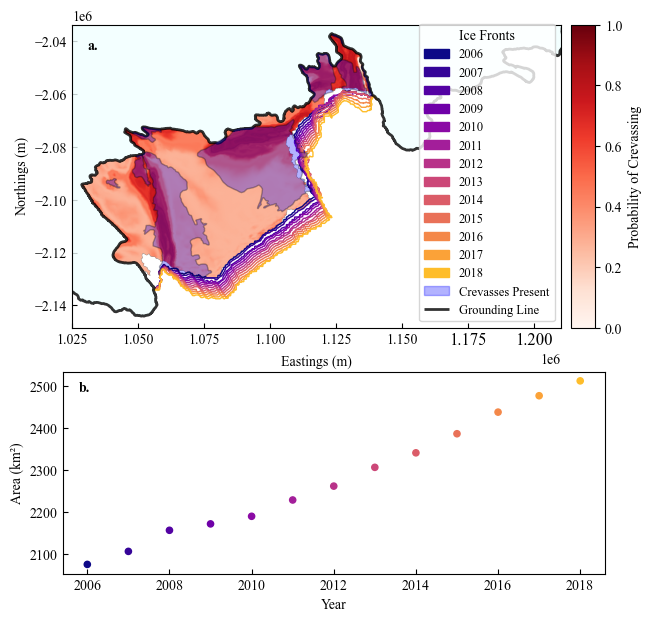

In [676]:
fig, axes = plt.subplots(2, 1, figsize=(160/25.4, 160/25.4), gridspec_kw={'height_ratios': [3,2]})

ax0 = axes[0]
vel_mean = np.ma.masked_invalid(vel_mean)
first_img_plot = ax0.imshow(eff_strain, cmap='Reds', extent=extent, origin='upper', vmin=0, vmax=1)

years = list(range(2006, 2019))
n = len(years) + 2
cmap = cm.get_cmap('plasma', n)
area_colour_dict = {year: cmap(i / (n - 1)) for i, year in enumerate(years)}

for year in years:
    gdf = globals().get(f'ice_front_{year}')  
    if gdf is not None:
        gdf.plot(ax=ax0, edgecolor=area_colour_dict[year], facecolor='none', linewidth=1)

groundingline.plot(ax=ax0, edgecolor='black', facecolor='azure', linewidth=2, label='Grounding Line', alpha=0.8)
current_crevasses.plot(ax=ax0, edgecolor='black', facecolor='blue', linewidth=1, alpha = 0.3)

divider0 = make_axes_locatable(ax0)
cax0 = divider0.append_axes("right", size="5%", pad=0.1)
cbar0 = fig.colorbar(first_img_plot, cax=cax0)
cbar0.set_label("Probability of Crevassing", fontsize=10, fontfamily='Times New Roman')
for label in cbar0.ax.get_yticklabels():
    label.set_fontname('Times New Roman')
    label.set_fontsize(10)

ax0.set_xlabel('Eastings (m)', fontsize=10, fontfamily='Times New Roman')
ax0.set_ylabel('Northings (m)', fontsize=10, fontfamily='Times New Roman')

ax0.tick_params(direction='in')
ax0.set_xlim(xlimit2)
ax0.set_ylim(ylimit2)
ax0.set_aspect('equal')
ax0.xaxis.get_offset_text().set_fontsize(10)
ax0.xaxis.get_offset_text().set_family('Times New Roman')
ax0.yaxis.get_offset_text().set_fontsize(10)
ax0.yaxis.get_offset_text().set_family('Times New Roman')
for label in (ax0.get_xticklabels() + ax0.get_yticklabels()):
    label.set_fontsize(10)
    label.set_family('Times New Roman')

legend_handles = [mpatches.Patch(color=area_colour_dict[year], label=str(year)) for year in years]
crev_patch = mpatches.Patch(color='blue', label='Crevasses Present', alpha=0.3, edgecolor='black')
legend_handles.append(crev_patch)
extra_handles, _ = ax0.get_legend_handles_labels()
legend_handles += extra_handles
legend = ax0.legend(handles=legend_handles, title='Ice Fronts', loc='lower right', prop={'size': 9, 'family': 'Times New Roman'}, title_fontsize=10)
legend.get_frame().set_linewidth(1)
legend.get_title().set_fontfamily('Times New Roman')


#########################################################
ax1 = axes[1]
area_colours = [area_colour_dict[year] for year in area_year]
ax1.scatter(area_year, area, c=area_colours, s=20)
ax1.set_xlabel('Year', fontsize=10, fontfamily='Times New Roman')
ax1.set_ylabel('Area (km²)', fontsize=10, fontfamily='Times New Roman')
for label in (ax1.get_xticklabels() + ax1.get_yticklabels()):
    label.set_fontsize(10)
    label.set_family('Times New Roman')
ax1.tick_params(direction='in')

#########################################################
ax0.text(0.03, 0.95, "a.", transform=ax0.transAxes, fontsize=10, fontname = 'Times New Roman', fontweight='bold', va='top', ha='left')
ax1.text(0.03, 0.95, "b.", transform=ax1.transAxes, fontsize=10, fontname = 'Times New Roman', fontweight='bold', va='top', ha='left')

plt.tight_layout(pad=0.1, h_pad=0.2)
#plt.savefig('figure_1_MEAN_probability.jpg', dpi=500, bbox_inches='tight')
plt.show()

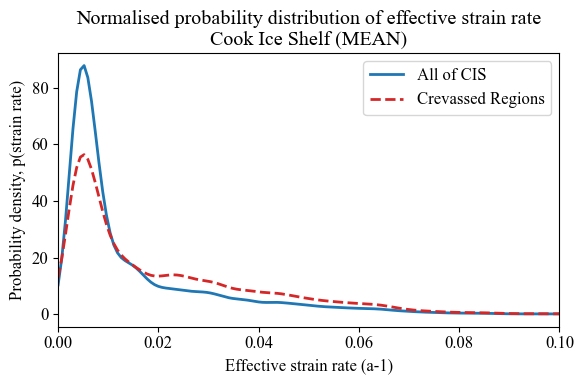

In [655]:
crevasses = gpd.read_file("TEST_POLYGON_crevasses_identified.shp")    # note to self: CHANGE THIS INPUT AS NEEDED

with rasterio.open("eff_MEAN.tif") as src: ##############################################################################################################################
    strain_data = src.read(1)  
    strain_data = strain_data.astype(float)
    strain_data[strain_data == src.nodata] = np.nan  
    strain_data[strain_data == 0.0] = np.nan 
    affine = src.transform

# Extract strain rates at crevasse locations
crevasse_geoms = [mapping(geom) for geom in crevasses.geometry]

with rasterio.open("eff_MEAN.tif") as src:  ###############################################################################################################################
    crevasse_masked, _ = rasterio.mask.mask(src, crevasse_geoms, crop=False)
    crevasse_strain = crevasse_masked[0].astype(float)
    crevasse_strain[crevasse_strain == src.nodata] = np.nan
    crevasse_strain[crevasse_strain == 0.0] = np.nan 

all_strain = strain_data[~np.isnan(strain_data)].flatten()
crev_strain = crevasse_strain[~np.isnan(crevasse_strain)].flatten()

# KDE = gaussian (smoothed) kernal density estimation - SAME AS PDF
kde_all = gaussian_kde(all_strain) # this line estimates the prob. density of all strain values across the ice shelf
kde_crev = gaussian_kde(crev_strain) # this line estimates the density of strain values for the CREVASSED regions

x_vals = np.linspace(0, max(all_strain.max(), crev_strain.max()), 500) # 500 bins. Higher value = smoother graph

# Evaluate KDE at each 'x' point
pdf_all = kde_all(x_vals)
pdf_crev = kde_crev(x_vals)

# Normalise so area under curve = 1
dx = x_vals[1] - x_vals[0]
pdf_all /= np.sum(pdf_all * dx)
pdf_crev /= np.sum(pdf_crev * dx)

rcParams['font.family'] = 'Times New Roman'
rcParams['font.size'] = 12
fig, ax = plt.subplots(figsize=(6,4))
ax.plot(x_vals, pdf_all, color='tab:blue', lw=2, label="All of CIS")
ax.plot(x_vals, pdf_crev, color='tab:red', lw=2, linestyle="--", label="Crevassed Regions")
ax.set_xlabel("Effective strain rate (a-1)")
ax.set_ylabel("Probability density, p(strain rate)")
ax.set_xlim(0, 0.1)
ax.legend()
plt.title("Normalised probability distribution of effective strain rate\nCook Ice Shelf (MEAN)") #####################################################################################
plt.tight_layout()
plt.savefig('MEAN_PDF.jpg', dpi=500, bbox_inches='tight') ###################################################################################################################
plt.show()

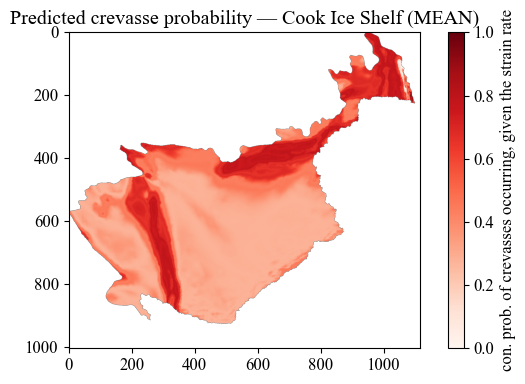

In [657]:
## THIS IS CONDITIONAL PROBABILITY: THE PROBABILITY OF 'A' HAPPENING, GIVEN THAT 'B' HAS ALREADY OCCURRED

P_crev = len(crev_strain) / len(all_strain)  # fraction of pixels that are crevasses

# data prepping
pdf_all_safe = np.copy(pdf_all)
pdf_all_safe[pdf_all_safe == 0] = 1e-10

# CALCULATES the CONDITIONAL PROBABILITY
prob_func = interp1d(x_vals, (pdf_crev / pdf_all_safe) * P_crev, bounds_error=False, fill_value=0.0)

# Preps data for a new raster, and calculates the conditional probability at every pixel in this original strain raster
prob_raster = prob_func(strain_data)
prob_raster[np.isnan(strain_data)] = np.nan

plt.figure(figsize=(6,4))
plt.imshow(prob_raster, cmap="Reds", origin="upper", vmin = 0, vmax=1)
plt.colorbar(label="con. prob. of crevasses occurring, given the strain rate")
plt.title("Predicted crevasse probability — Cook Ice Shelf (MEAN)") ###################################################################################################################
plt.tight_layout()
plt.savefig('MEAN_map.jpg', dpi=500, bbox_inches='tight') ###################################################################################################################
plt.show()

# COMPLETE EXAMPLE: 2018

In [12]:
from matplotlib.colors import ListedColormap
import rasterio
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd 
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.lines import Line2D
import matplotlib.patches as mpatches
import matplotlib.cm as cm
import matplotlib.colors as mcolors
import pandas as pd
from shapely.geometry import mapping
from scipy.stats import gaussian_kde
from scipy.interpolate import interp1d
from matplotlib import rcParams

In [8]:
crevasses = gpd.read_file("TEST_POLYGON_crevasses_identified.shp")    # note to self: CHANGE THIS INPUT AS NEEDED

with rasterio.open("eff_2018.tif") as src:    # note to self: CHANGE THIS INPUT AS NEEDED
    strain_data = src.read(1)  
    strain_data = strain_data.astype(float)
    strain_data[strain_data == src.nodata] = np.nan  
    strain_data[strain_data == 0.0] = np.nan 
    affine = src.transform

# Extract strain rates at crevasse locations
crevasse_geoms = [mapping(geom) for geom in crevasses.geometry]

with rasterio.open("eff_2018.tif") as src:    # note to self: CHANGE THIS INPUT AS NEEDED
    crevasse_masked, _ = rasterio.mask.mask(src, crevasse_geoms, crop=False)
    crevasse_strain = crevasse_masked[0].astype(float)
    crevasse_strain[crevasse_strain == src.nodata] = np.nan
    crevasse_strain[crevasse_strain == 0.0] = np.nan 

all_strain = strain_data[~np.isnan(strain_data)].flatten()
crev_strain = crevasse_strain[~np.isnan(crevasse_strain)].flatten()

AttributeError: module 'rasterio' has no attribute 'mask'

In [10]:
# KDE = gaussian (smoothed) kernal density estimation - SAME AS PDF
kde_all = gaussian_kde(all_strain) # this line estimates the prob. density of all strain values across the ice shelf
kde_crev = gaussian_kde(crev_strain) # this line estimates the density of strain values for the CREVASSED regions

x_vals = np.linspace(0, max(all_strain.max(), crev_strain.max()), 500) # 500 bins. Higher value = smoother graph

# Evaluate KDE at each 'x' point
pdf_all = kde_all(x_vals)
pdf_crev = kde_crev(x_vals)

# Normalise so area under curve = 1
dx = x_vals[1] - x_vals[0]
pdf_all /= np.sum(pdf_all * dx)
pdf_crev /= np.sum(pdf_crev * dx)

NameError: name 'all_strain' is not defined

In [583]:
## THIS IS CONDITIONAL PROBABILITY: THE PROBABILITY OF 'A' HAPPENING, GIVEN THAT 'B' HAS ALREADY OCCURRED

P_crev = len(crev_strain) / len(all_strain)  # fraction of pixels that are crevasses

# data prepping
pdf_all_safe = np.copy(pdf_all)
pdf_all_safe[pdf_all_safe == 0] = 1e-10

# CALCULATES the CONDITIONAL PROBABILITY
prob_func = interp1d(x_vals, (pdf_crev / pdf_all_safe) * P_crev, bounds_error=False, fill_value=0.0)

# Preps data for a new raster, and calculates the conditional probability at every pixel in this original strain raster
prob_raster = prob_func(strain_data)
prob_raster[np.isnan(strain_data)] = np.nan
# prob_raster = np.clip(prob_raster, 0, 1)
out_meta = src.meta.copy()
out_meta.update({"dtype": "float32", "count": 1, "nodata": np.nan})
with rasterio.open("probability_crevasse_2018.tif", "w", **out_meta) as dst:    # note to self: CHANGE THIS OUTPUT NAME AS NEEDED
    dst.write(prob_raster.astype(np.float32), 1)


In [584]:
xlimit = (1025000, 1140000)
ylimit = (-2148431.9935, -2033743.9935)

xlimit2 = (1025000, 1210000)
ylimit2 = (-2148431.9935, -2033743.9935)

In [585]:
tif_path = "probability_crevasse_2018.tif"
with rasterio.open(tif_path) as src:
    eff_strain = src.read(1)
    extent = [src.bounds.left, src.bounds.right, src.bounds.bottom, src.bounds.top]

groundingline = gpd.read_file('2003_GL_full_cook_complete_dissolved_larger.shp')
current_crevasses = gpd.read_file('crevasses_identified.shp')

ice_front_2006 = gpd.read_file(r'C:\Users\jjls0\OneDrive\Documents\HONOURS\PROGRAMS\zzResults_Figures\Crevassing_Calving\figure_1\ice_fronts\ice_front_2006.shp')
ice_front_2007 = gpd.read_file(r'C:\Users\jjls0\OneDrive\Documents\HONOURS\PROGRAMS\zzResults_Figures\Crevassing_Calving\figure_1\ice_fronts\ice_front_2007.shp')
ice_front_2008 = gpd.read_file(r'C:\Users\jjls0\OneDrive\Documents\HONOURS\PROGRAMS\zzResults_Figures\Crevassing_Calving\figure_1\ice_fronts\ice_front_2008.shp')
ice_front_2009 = gpd.read_file(r'C:\Users\jjls0\OneDrive\Documents\HONOURS\PROGRAMS\zzResults_Figures\Crevassing_Calving\figure_1\ice_fronts\ice_front_2009.shp')
ice_front_2010 = gpd.read_file(r'C:\Users\jjls0\OneDrive\Documents\HONOURS\PROGRAMS\zzResults_Figures\Crevassing_Calving\figure_1\ice_fronts\ice_front_2010.shp')
ice_front_2011 = gpd.read_file(r'C:\Users\jjls0\OneDrive\Documents\HONOURS\PROGRAMS\zzResults_Figures\Crevassing_Calving\figure_1\ice_fronts\ice_front_2011.shp')
ice_front_2012 = gpd.read_file(r'C:\Users\jjls0\OneDrive\Documents\HONOURS\PROGRAMS\zzResults_Figures\Crevassing_Calving\figure_1\ice_fronts\ice_front_2012.shp')
ice_front_2013 = gpd.read_file(r'C:\Users\jjls0\OneDrive\Documents\HONOURS\PROGRAMS\zzResults_Figures\Crevassing_Calving\figure_1\ice_fronts\ice_front_2013.shp')
ice_front_2014 = gpd.read_file(r'C:\Users\jjls0\OneDrive\Documents\HONOURS\PROGRAMS\zzResults_Figures\Crevassing_Calving\figure_1\ice_fronts\ice_front_2014.shp')
ice_front_2015 = gpd.read_file(r'C:\Users\jjls0\OneDrive\Documents\HONOURS\PROGRAMS\zzResults_Figures\Crevassing_Calving\figure_1\ice_fronts\ice_front_2015.shp')
ice_front_2016 = gpd.read_file(r'C:\Users\jjls0\OneDrive\Documents\HONOURS\PROGRAMS\zzResults_Figures\Crevassing_Calving\figure_1\ice_fronts\ice_front_2016.shp')
ice_front_2017 = gpd.read_file(r'C:\Users\jjls0\OneDrive\Documents\HONOURS\PROGRAMS\zzResults_Figures\Crevassing_Calving\figure_1\ice_fronts\ice_front_2017.shp')
ice_front_2018 = gpd.read_file(r'C:\Users\jjls0\OneDrive\Documents\HONOURS\PROGRAMS\zzResults_Figures\Crevassing_Calving\figure_1\ice_fronts\ice_front_2018.shp')


In [586]:
annual_area = pd.read_excel('annual_area.xlsx')
area_year = annual_area['Year']
area = annual_area['Annual_Area(km2)']

n = len(area_year) + 2
cmap = cm.get_cmap('plasma', n)
area_colour_dict = {year: cmap(i / (n - 1)) for i, year in enumerate(sorted(set(area_year)))}

C:\Users\jjls0\AppData\Local\Temp\ipykernel_17900\1099742362.py:6: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('plasma', n)


C:\Users\jjls0\AppData\Local\Temp\ipykernel_17900\831380548.py:9: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('plasma', n)
C:\Users\jjls0\AppData\Local\Temp\ipykernel_17900\831380548.py:44: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  crev_patch = mpatches.Patch(color='blue', label='Crevasses Present', alpha=0.3, edgecolor='black')


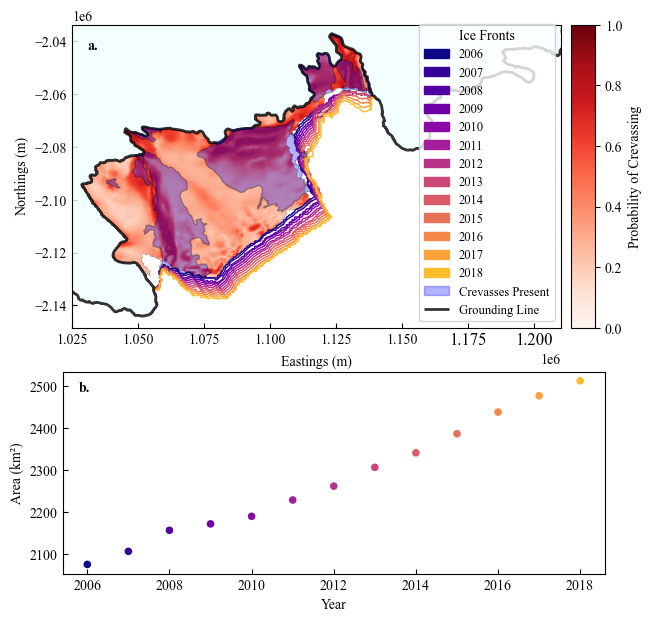

In [624]:
fig, axes = plt.subplots(2, 1, figsize=(160/25.4, 160/25.4), gridspec_kw={'height_ratios': [3,2]})

ax0 = axes[0]
vel_mean = np.ma.masked_invalid(vel_mean)
first_img_plot = ax0.imshow(eff_strain, cmap='Reds', extent=extent, origin='upper', vmin=0, vmax=1)

years = list(range(2006, 2019))
n = len(years) + 2
cmap = cm.get_cmap('plasma', n)
area_colour_dict = {year: cmap(i / (n - 1)) for i, year in enumerate(years)}

for year in years:
    gdf = globals().get(f'ice_front_{year}')  
    if gdf is not None:
        gdf.plot(ax=ax0, edgecolor=area_colour_dict[year], facecolor='none', linewidth=1)

groundingline.plot(ax=ax0, edgecolor='black', facecolor='azure', linewidth=2, label='Grounding Line', alpha=0.8)
current_crevasses.plot(ax=ax0, edgecolor='black', facecolor='blue', linewidth=1, alpha = 0.3)

divider0 = make_axes_locatable(ax0)
cax0 = divider0.append_axes("right", size="5%", pad=0.1)
cbar0 = fig.colorbar(first_img_plot, cax=cax0)
cbar0.set_label("Probability of Crevassing", fontsize=10, fontfamily='Times New Roman')
for label in cbar0.ax.get_yticklabels():
    label.set_fontname('Times New Roman')
    label.set_fontsize(10)

ax0.set_xlabel('Eastings (m)', fontsize=10, fontfamily='Times New Roman')
ax0.set_ylabel('Northings (m)', fontsize=10, fontfamily='Times New Roman')

ax0.tick_params(direction='in')
ax0.set_xlim(xlimit2)
ax0.set_ylim(ylimit2)
ax0.set_aspect('equal')
ax0.xaxis.get_offset_text().set_fontsize(10)
ax0.xaxis.get_offset_text().set_family('Times New Roman')
ax0.yaxis.get_offset_text().set_fontsize(10)
ax0.yaxis.get_offset_text().set_family('Times New Roman')
for label in (ax0.get_xticklabels() + ax0.get_yticklabels()):
    label.set_fontsize(10)
    label.set_family('Times New Roman')

legend_handles = [mpatches.Patch(color=area_colour_dict[year], label=str(year)) for year in years]
crev_patch = mpatches.Patch(color='blue', label='Crevasses Present', alpha=0.3, edgecolor='black')
legend_handles.append(crev_patch)
extra_handles, _ = ax0.get_legend_handles_labels()
legend_handles += extra_handles
legend = ax0.legend(handles=legend_handles, title='Ice Fronts', loc='lower right', prop={'size': 9, 'family': 'Times New Roman'}, title_fontsize=10)
legend.get_frame().set_linewidth(1)
legend.get_title().set_fontfamily('Times New Roman')


#########################################################
ax1 = axes[1]
area_colours = [area_colour_dict[year] for year in area_year]
ax1.scatter(area_year, area, c=area_colours, s=20)
ax1.set_xlabel('Year', fontsize=10, fontfamily='Times New Roman')
ax1.set_ylabel('Area (km²)', fontsize=10, fontfamily='Times New Roman')
for label in (ax1.get_xticklabels() + ax1.get_yticklabels()):
    label.set_fontsize(10)
    label.set_family('Times New Roman')
ax1.tick_params(direction='in')

#########################################################
ax0.text(0.03, 0.95, "a.", transform=ax0.transAxes, fontsize=10, fontname = 'Times New Roman', fontweight='bold', va='top', ha='left')
ax1.text(0.03, 0.95, "b.", transform=ax1.transAxes, fontsize=10, fontname = 'Times New Roman', fontweight='bold', va='top', ha='left')

plt.tight_layout(pad=0.1, h_pad=0.2)
#plt.savefig('figure_1_2018_probability.jpg', dpi=500, bbox_inches='tight')
plt.show()

# MEDIAN - THIS ONE USED FOR FIGURE!!

### plotting the first figure

In [18]:
import geopandas as gpd
import rasterio
import rasterio.mask
import numpy as np
import matplotlib.pyplot as plt
from shapely.geometry import mapping
from scipy.stats import gaussian_kde
from scipy.interpolate import interp1d
from matplotlib import rcParams


In [8]:
years = [2006, 2008, 2009, 2010, 2011, 2014, 2015, 2016, 2017, 2018]
arrays = []
meta = None

for year in years:
    filename = f"eff_{year}.tif"
    with rasterio.open(filename) as src:
        data = src.read(1).astype(float)
        data[data == src.nodata] = np.nan 
        arrays.append(data)
        if meta is None:
            meta = src.meta.copy()

stack = np.stack(arrays, axis=0)  
median_arr = np.nanmedian(stack, axis=0)   

meta.update(dtype="float32", count=1, nodata=np.nan)
with rasterio.open("eff_MEDIAN.tif", "w", **meta) as dst:
    dst.write(median_arr.astype(np.float32), 1)


C:\Users\jjls0\AppData\Local\Temp\ipykernel_1276\134347293.py:15: RuntimeWarning: All-NaN slice encountered
  median_arr = np.nanmedian(stack, axis=0)


In [20]:
crevasses = gpd.read_file("TEST_POLYGON_crevasses_identified.shp")    # note to self: CHANGE THIS INPUT AS NEEDED

with rasterio.open("eff_MEDIAN.tif") as src:    # note to self: CHANGE THIS INPUT AS NEEDED
    strain_data = src.read(1)  
    strain_data = strain_data.astype(float)
    strain_data[strain_data == src.nodata] = np.nan  
    strain_data[strain_data == 0.0] = np.nan 
    affine = src.transform

# Extract strain rates at crevasse locations
crevasse_geoms = [mapping(geom) for geom in crevasses.geometry]

with rasterio.open("eff_MEDIAN.tif") as src:    # note to self: CHANGE THIS INPUT AS NEEDED
    crevasse_masked, _ = rasterio.mask.mask(src, crevasse_geoms, crop=False)
    crevasse_strain = crevasse_masked[0].astype(float)
    crevasse_strain[crevasse_strain == src.nodata] = np.nan
    crevasse_strain[crevasse_strain == 0.0] = np.nan 

all_strain = strain_data[~np.isnan(strain_data)].flatten()
crev_strain = crevasse_strain[~np.isnan(crevasse_strain)].flatten()

In [22]:
# KDE = gaussian (smoothed) kernal density estimation - SAME AS PDF
kde_all = gaussian_kde(all_strain) # this line estimates the prob. density of all strain values across the ice shelf
kde_crev = gaussian_kde(crev_strain) # this line estimates the density of strain values for the CREVASSED regions

x_vals = np.linspace(0, max(all_strain.max(), crev_strain.max()), 500) # 500 bins. Higher value = smoother graph

# Evaluate KDE at each 'x' point
pdf_all = kde_all(x_vals)
pdf_crev = kde_crev(x_vals)

# Normalise so area under curve = 1
dx = x_vals[1] - x_vals[0]
pdf_all /= np.sum(pdf_all * dx)
pdf_crev /= np.sum(pdf_crev * dx)

In [24]:
## THIS IS CONDITIONAL PROBABILITY: THE PROBABILITY OF 'A' HAPPENING, GIVEN THAT 'B' HAS ALREADY OCCURRED

P_crev = len(crev_strain) / len(all_strain)  # fraction of pixels that are crevasses

# data prepping
pdf_all_safe = np.copy(pdf_all)
pdf_all_safe[pdf_all_safe == 0] = 1e-10

# CALCULATES the CONDITIONAL PROBABILITY
prob_func = interp1d(x_vals, (pdf_crev / pdf_all_safe) * P_crev, bounds_error=False, fill_value=0.0)

# Preps data for a new raster, and calculates the conditional probability at every pixel in this original strain raster
prob_raster = prob_func(strain_data)
prob_raster[np.isnan(strain_data)] = np.nan
# prob_raster = np.clip(prob_raster, 0, 1)
out_meta = src.meta.copy()
out_meta.update({"dtype": "float32", "count": 1, "nodata": np.nan})
with rasterio.open("MEDIAN_probability.tif", "w", **out_meta) as dst:    # note to self: CHANGE THIS OUTPUT NAME AS NEEDED
    dst.write(prob_raster.astype(np.float32), 1)


In [26]:
xlimit = (1025000, 1140000)
ylimit = (-2148431.9935, -2033743.9935)

xlimit2 = (1025000, 1210000)
ylimit2 = (-2148431.9935, -2033743.9935)

In [28]:
tif_path = "MEDIAN_probability.tif"
with rasterio.open(tif_path) as src:
    eff_strain = src.read(1)
    extent = [src.bounds.left, src.bounds.right, src.bounds.bottom, src.bounds.top]

groundingline = gpd.read_file('2003_GL_full_cook_complete_dissolved_larger.shp')
current_crevasses = gpd.read_file('crevasses_identified.shp')

ice_front_2006 = gpd.read_file(r'C:\Users\jjls0\OneDrive\Documents\HONOURS\PROGRAMS\zzResults_Figures\Crevassing_Calving\figure_1\ice_fronts\ice_front_2006.shp')
ice_front_2007 = gpd.read_file(r'C:\Users\jjls0\OneDrive\Documents\HONOURS\PROGRAMS\zzResults_Figures\Crevassing_Calving\figure_1\ice_fronts\ice_front_2007.shp')
ice_front_2008 = gpd.read_file(r'C:\Users\jjls0\OneDrive\Documents\HONOURS\PROGRAMS\zzResults_Figures\Crevassing_Calving\figure_1\ice_fronts\ice_front_2008.shp')
ice_front_2009 = gpd.read_file(r'C:\Users\jjls0\OneDrive\Documents\HONOURS\PROGRAMS\zzResults_Figures\Crevassing_Calving\figure_1\ice_fronts\ice_front_2009.shp')
ice_front_2010 = gpd.read_file(r'C:\Users\jjls0\OneDrive\Documents\HONOURS\PROGRAMS\zzResults_Figures\Crevassing_Calving\figure_1\ice_fronts\ice_front_2010.shp')
ice_front_2011 = gpd.read_file(r'C:\Users\jjls0\OneDrive\Documents\HONOURS\PROGRAMS\zzResults_Figures\Crevassing_Calving\figure_1\ice_fronts\ice_front_2011.shp')
ice_front_2012 = gpd.read_file(r'C:\Users\jjls0\OneDrive\Documents\HONOURS\PROGRAMS\zzResults_Figures\Crevassing_Calving\figure_1\ice_fronts\ice_front_2012.shp')
ice_front_2013 = gpd.read_file(r'C:\Users\jjls0\OneDrive\Documents\HONOURS\PROGRAMS\zzResults_Figures\Crevassing_Calving\figure_1\ice_fronts\ice_front_2013.shp')
ice_front_2014 = gpd.read_file(r'C:\Users\jjls0\OneDrive\Documents\HONOURS\PROGRAMS\zzResults_Figures\Crevassing_Calving\figure_1\ice_fronts\ice_front_2014.shp')
ice_front_2015 = gpd.read_file(r'C:\Users\jjls0\OneDrive\Documents\HONOURS\PROGRAMS\zzResults_Figures\Crevassing_Calving\figure_1\ice_fronts\ice_front_2015.shp')
ice_front_2016 = gpd.read_file(r'C:\Users\jjls0\OneDrive\Documents\HONOURS\PROGRAMS\zzResults_Figures\Crevassing_Calving\figure_1\ice_fronts\ice_front_2016.shp')
ice_front_2017 = gpd.read_file(r'C:\Users\jjls0\OneDrive\Documents\HONOURS\PROGRAMS\zzResults_Figures\Crevassing_Calving\figure_1\ice_fronts\ice_front_2017.shp')
ice_front_2018 = gpd.read_file(r'C:\Users\jjls0\OneDrive\Documents\HONOURS\PROGRAMS\zzResults_Figures\Crevassing_Calving\figure_1\ice_fronts\ice_front_2018.shp')


In [29]:
annual_area = pd.read_excel('annual_area.xlsx')
area_year = annual_area['Year']
area = annual_area['Annual_Area(km2)']

n = len(area_year) + 2
cmap = cm.get_cmap('plasma', n)
area_colour_dict = {year: cmap(i / (n - 1)) for i, year in enumerate(sorted(set(area_year)))}

C:\Users\jjls0\AppData\Local\Temp\ipykernel_1276\1099742362.py:6: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('plasma', n)


C:\Users\jjls0\AppData\Local\Temp\ipykernel_1276\348747444.py:9: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('plasma', n)
C:\Users\jjls0\AppData\Local\Temp\ipykernel_1276\348747444.py:44: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  crev_patch = mpatches.Patch(color='grey', label='Crevasses Present', alpha=0.6, edgecolor='black')


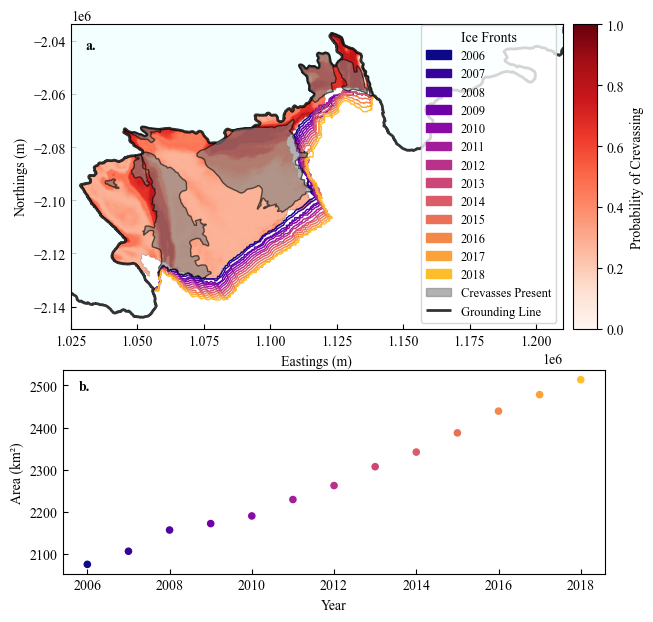

In [36]:
fig, axes = plt.subplots(2, 1, figsize=(160/25.4, 160/25.4), gridspec_kw={'height_ratios': [3,2]})

ax0 = axes[0]
#vel_mean = np.ma.masked_invalid(vel_mean)
first_img_plot = ax0.imshow(eff_strain, cmap='Reds', extent=extent, origin='upper', vmin=0, vmax=1)

years = list(range(2006, 2019))
n = len(years) + 2
cmap = cm.get_cmap('plasma', n)
area_colour_dict = {year: cmap(i / (n - 1)) for i, year in enumerate(years)}

for year in years:
    gdf = globals().get(f'ice_front_{year}')  
    if gdf is not None:
        gdf.plot(ax=ax0, edgecolor=area_colour_dict[year], facecolor='none', linewidth=1)

groundingline.plot(ax=ax0, edgecolor='black', facecolor='azure', linewidth=2, label='Grounding Line', alpha=0.8)
current_crevasses.plot(ax=ax0, edgecolor='black', facecolor='grey', linewidth=1, alpha = 0.6)

divider0 = make_axes_locatable(ax0)
cax0 = divider0.append_axes("right", size="5%", pad=0.1)
cbar0 = fig.colorbar(first_img_plot, cax=cax0)
cbar0.set_label("Probability of Crevassing", fontsize=10, fontfamily='Times New Roman')
for label in cbar0.ax.get_yticklabels():
    label.set_fontname('Times New Roman')
    label.set_fontsize(10)

ax0.set_xlabel('Eastings (m)', fontsize=10, fontfamily='Times New Roman')
ax0.set_ylabel('Northings (m)', fontsize=10, fontfamily='Times New Roman')

ax0.tick_params(direction='in')
ax0.set_xlim(xlimit2)
ax0.set_ylim(ylimit2)
ax0.set_aspect('equal')
ax0.xaxis.get_offset_text().set_fontsize(10)
ax0.xaxis.get_offset_text().set_family('Times New Roman')
ax0.yaxis.get_offset_text().set_fontsize(10)
ax0.yaxis.get_offset_text().set_family('Times New Roman')
for label in (ax0.get_xticklabels() + ax0.get_yticklabels()):
    label.set_fontsize(10)
    label.set_family('Times New Roman')

legend_handles = [mpatches.Patch(color=area_colour_dict[year], label=str(year)) for year in years]
crev_patch = mpatches.Patch(color='grey', label='Crevasses Present', alpha=0.6, edgecolor='black')
legend_handles.append(crev_patch)
extra_handles, _ = ax0.get_legend_handles_labels()
legend_handles += extra_handles
legend = ax0.legend(handles=legend_handles, title='Ice Fronts', loc='lower right', prop={'size': 9, 'family': 'Times New Roman'}, title_fontsize=10)
legend.get_frame().set_linewidth(1)
legend.get_title().set_fontfamily('Times New Roman')


#########################################################
ax1 = axes[1]
area_colours = [area_colour_dict[year] for year in area_year]
ax1.scatter(area_year, area, c=area_colours, s=20)
ax1.set_xlabel('Year', fontsize=10, fontfamily='Times New Roman')
ax1.set_ylabel('Area (km²)', fontsize=10, fontfamily='Times New Roman')
for label in (ax1.get_xticklabels() + ax1.get_yticklabels()):
    label.set_fontsize(10)
    label.set_family('Times New Roman')
ax1.tick_params(direction='in')

#########################################################
ax0.text(0.03, 0.95, "a.", transform=ax0.transAxes, fontsize=10, fontname = 'Times New Roman', fontweight='bold', va='top', ha='left')
ax1.text(0.03, 0.95, "b.", transform=ax1.transAxes, fontsize=10, fontname = 'Times New Roman', fontweight='bold', va='top', ha='left')

plt.tight_layout(pad=0.1, h_pad=0.2)
#plt.savefig('figure_1_MEDIAN_probability.jpg', dpi=500, bbox_inches='tight')
plt.show()

In [ ]:
fig, axes = plt.subplots(2, 1, figsize=(160/25.4, 160/25.4), gridspec_kw={'height_ratios': [3,2]})

ax0 = axes[0]
#vel_mean = np.ma.masked_invalid(vel_mean)
first_img_plot = ax0.imshow(eff_strain, cmap='Reds', extent=extent, origin='upper', vmin=0, vmax=1)

years = list(range(2006, 2019))
n = len(years) + 2
cmap = cm.get_cmap('plasma', n)
area_colour_dict = {year: cmap(i / (n - 1)) for i, year in enumerate(years)}

for year in years:
    gdf = globals().get(f'ice_front_{year}')  
    if gdf is not None:
        gdf.plot(ax=ax0, edgecolor=area_colour_dict[year], facecolor='none', linewidth=1)

groundingline.plot(ax=ax0, edgecolor='black', facecolor='azure', linewidth=2, label='Grounding Line', alpha=0.8)
current_crevasses.plot(ax=ax0, edgecolor='black', facecolor='grey', linewidth=1, alpha = 0.6)

divider0 = make_axes_locatable(ax0)
cax0 = divider0.append_axes("right", size="5%", pad=0.1)
cbar0 = fig.colorbar(first_img_plot, cax=cax0)
cbar0.set_label("Probability of Crevassing", fontsize=10, fontfamily='Times New Roman')
for label in cbar0.ax.get_yticklabels():
    label.set_fontname('Times New Roman')
    label.set_fontsize(10)

ax0.set_xlabel('Eastings (m)', fontsize=10, fontfamily='Times New Roman')
ax0.set_ylabel('Northings (m)', fontsize=10, fontfamily='Times New Roman')

ax0.tick_params(direction='in')
ax0.set_xlim(xlimit2)
ax0.set_ylim(ylimit2)
ax0.set_aspect('equal')
ax0.xaxis.get_offset_text().set_fontsize(10)
ax0.xaxis.get_offset_text().set_family('Times New Roman')
ax0.yaxis.get_offset_text().set_fontsize(10)
ax0.yaxis.get_offset_text().set_family('Times New Roman')
for label in (ax0.get_xticklabels() + ax0.get_yticklabels()):
    label.set_fontsize(10)
    label.set_family('Times New Roman')

legend_handles = [mpatches.Patch(color=area_colour_dict[year], label=str(year)) for year in years]
crev_patch = mpatches.Patch(color='grey', label='Crevasses Present', alpha=0.6, edgecolor='black')
legend_handles.append(crev_patch)
extra_handles, _ = ax0.get_legend_handles_labels()
legend_handles += extra_handles
legend = ax0.legend(handles=legend_handles, title='Ice Fronts', loc='lower right', prop={'size': 9, 'family': 'Times New Roman'}, title_fontsize=10)
legend.get_frame().set_linewidth(1)
legend.get_title().set_fontfamily('Times New Roman')


#########################################################
ax1 = axes[1]
area_colours = [area_colour_dict[year] for year in area_year]
ax1.scatter(area_year, area, c=area_colours, s=20)
ax1.set_xlabel('Year', fontsize=10, fontfamily='Times New Roman')
ax1.set_ylabel('Area (km²)', fontsize=10, fontfamily='Times New Roman')
for label in (ax1.get_xticklabels() + ax1.get_yticklabels()):
    label.set_fontsize(10)
    label.set_family('Times New Roman')
ax1.tick_params(direction='in')

#########################################################
ax0.text(0.03, 0.95, "a.", transform=ax0.transAxes, fontsize=10, fontname = 'Times New Roman', fontweight='bold', va='top', ha='left')
ax1.text(0.03, 0.95, "b.", transform=ax1.transAxes, fontsize=10, fontname = 'Times New Roman', fontweight='bold', va='top', ha='left')

plt.tight_layout(pad=0.1, h_pad=0.2)
#plt.savefig('figure_1_MEDIAN_probability.jpg', dpi=500, bbox_inches='tight')
plt.show()

C:\Users\jjls0\AppData\Local\Temp\ipykernel_1276\1226930929.py:14: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('plasma', n)
C:\Users\jjls0\AppData\Local\Temp\ipykernel_1276\1226930929.py:59: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  crev_patch = mpatches.Patch(color='grey', label='Crevasses Present', alpha=0.6, edgecolor='black')


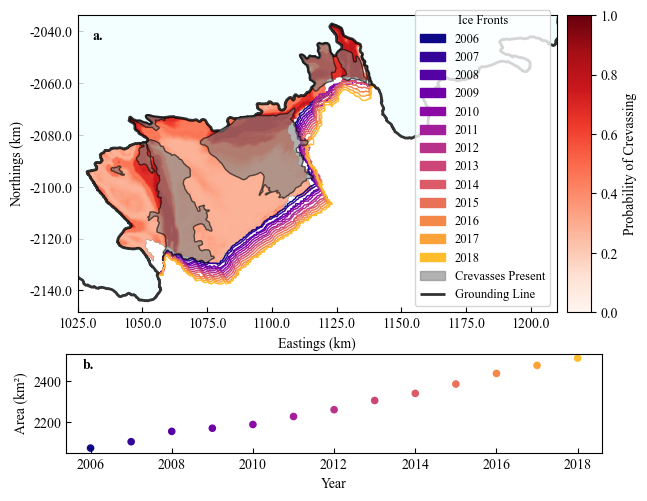

In [74]:
from matplotlib.ticker import FuncFormatter
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.patches as mpatches
import matplotlib.cm as cm

fig, axes = plt.subplots(2, 1, figsize=(160/25.4, 130/25.4), gridspec_kw={'height_ratios': [3,1]})

ax0 = axes[0]
first_img_plot = ax0.imshow(eff_strain, cmap='Reds', extent=extent, origin='upper', vmin=0, vmax=1)

# Plot ice fronts
years = list(range(2006, 2019))
n = len(years) + 2
cmap = cm.get_cmap('plasma', n)
area_colour_dict = {year: cmap(i / (n - 1)) for i, year in enumerate(years)}

for year in years:
    gdf_year = globals().get(f'ice_front_{year}')  
    if gdf_year is not None:
        gdf_year.plot(ax=ax0, edgecolor=area_colour_dict[year], facecolor='none', linewidth=1)

groundingline.plot(ax=ax0, edgecolor='black', facecolor='azure', linewidth=2, label='Grounding Line', alpha=0.8)
current_crevasses.plot(ax=ax0, edgecolor='black', facecolor='grey', linewidth=1, alpha=0.6)

# ----------------------------
# Colorbar
divider0 = make_axes_locatable(ax0)
cax0 = divider0.append_axes("right", size="5%", pad=0.1)
cbar0 = fig.colorbar(first_img_plot, cax=cax0)
cbar0.set_label("Probability of Crevassing", fontsize=10, family='Times New Roman')
for label in cbar0.ax.get_yticklabels():
    label.set_fontname('Times New Roman')
    label.set_fontsize(10)

# ----------------------------
# Convert axes to km
ax0.xaxis.set_major_formatter(FuncFormatter(lambda x, _: x / 1000))
ax0.yaxis.set_major_formatter(FuncFormatter(lambda y, _: y / 1000))
ax0.set_xlabel('Eastings (km)', fontsize=10, family='Times New Roman')
ax0.set_ylabel('Northings (km)', fontsize=10, family='Times New Roman')

# Update tick label fonts
for label in (ax0.get_xticklabels() + ax0.get_yticklabels()):
    label.set_fontsize(10)
    label.set_family('Times New Roman')

ax0.tick_params(direction='in')
ax0.set_xlim(xlimit2)
ax0.set_ylim(ylimit2)
ax0.set_aspect('equal')
ax0.xaxis.get_offset_text().set_fontsize(10)
ax0.xaxis.get_offset_text().set_family('Times New Roman')
ax0.yaxis.get_offset_text().set_fontsize(10)
ax0.yaxis.get_offset_text().set_family('Times New Roman')

# ----------------------------
# Legend
legend_handles = [mpatches.Patch(color=area_colour_dict[year], label=str(year)) for year in years]
crev_patch = mpatches.Patch(color='grey', label='Crevasses Present', alpha=0.6, edgecolor='black')
legend_handles.append(crev_patch)
extra_handles, _ = ax0.get_legend_handles_labels()
legend_handles += extra_handles
legend = ax0.legend(handles=legend_handles, title='Ice Fronts', loc='lower right', 
                    prop={'size': 9, 'family': 'Times New Roman'}, title_fontsize=9)
legend.get_frame().set_linewidth(1)
legend.get_title().set_fontfamily('Times New Roman')

# ----------------------------
ax1 = axes[1]
area_colours = [area_colour_dict[year] for year in area_year]
ax1.scatter(area_year, area, c=area_colours, s=20)
ax1.set_xlabel('Year', fontsize=10, family='Times New Roman')
ax1.set_ylabel('Area (km²)', fontsize=10, family='Times New Roman')
for label in (ax1.get_xticklabels() + ax1.get_yticklabels()):
    label.set_fontsize(10)
    label.set_family('Times New Roman')
ax1.tick_params(direction='in')

# ----------------------------
# Subplot labels
ax0.text(0.03, 0.95, "a.", transform=ax0.transAxes, fontsize=10, fontname='Times New Roman', 
         fontweight='bold', va='top', ha='left')
ax1.text(0.03, 0.95, "b.", transform=ax1.transAxes, fontsize=10, fontname='Times New Roman', 
         fontweight='bold', va='top', ha='left')

plt.tight_layout(pad=0.1, h_pad=0.2)
plt.show()


C:\Users\jjls0\AppData\Local\Temp\ipykernel_1276\675704422.py:14: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('plasma', n)
C:\Users\jjls0\AppData\Local\Temp\ipykernel_1276\675704422.py:59: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  crev_patch = mpatches.Patch(color='grey', label='Crevasses Present', alpha=0.6, edgecolor='black')


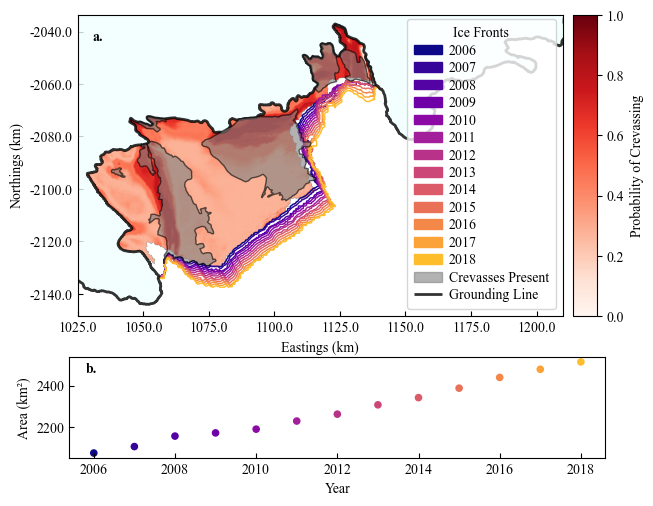

In [99]:
from matplotlib.ticker import FuncFormatter
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.patches as mpatches
import matplotlib.cm as cm

fig, axes = plt.subplots(2, 1, figsize=(160/25.4, 130/25.4), gridspec_kw={'height_ratios': [3,1]})

ax0 = axes[0]
first_img_plot = ax0.imshow(eff_strain, cmap='Reds', extent=extent, origin='upper', vmin=0, vmax=1)

# Plot ice fronts
years = list(range(2006, 2019))
n = len(years) + 2
cmap = cm.get_cmap('plasma', n)
area_colour_dict = {year: cmap(i / (n - 1)) for i, year in enumerate(years)}

for year in years:
    gdf_year = globals().get(f'ice_front_{year}')  
    if gdf_year is not None:
        gdf_year.plot(ax=ax0, edgecolor=area_colour_dict[year], facecolor='none', linewidth=1)

groundingline.plot(ax=ax0, edgecolor='black', facecolor='azure', linewidth=2, label='Grounding Line', alpha=0.8)
current_crevasses.plot(ax=ax0, edgecolor='black', facecolor='grey', linewidth=1, alpha=0.6)

# ----------------------------
# Colorbar
divider0 = make_axes_locatable(ax0)
cax0 = divider0.append_axes("right", size="5%", pad=0.1)
cbar0 = fig.colorbar(first_img_plot, cax=cax0)
cbar0.set_label("Probability of Crevassing", fontsize=10, family='Times New Roman')
for label in cbar0.ax.get_yticklabels():
    label.set_fontname('Times New Roman')
    label.set_fontsize(10)

# ----------------------------
# Convert axes to km
ax0.xaxis.set_major_formatter(FuncFormatter(lambda x, _: x / 1000))
ax0.yaxis.set_major_formatter(FuncFormatter(lambda y, _: y / 1000))
ax0.set_xlabel('Eastings (km)', fontsize=10, family='Times New Roman')
ax0.set_ylabel('Northings (km)', fontsize=10, family='Times New Roman')

# Update tick label fonts
for label in (ax0.get_xticklabels() + ax0.get_yticklabels()):
    label.set_fontsize(10)
    label.set_family('Times New Roman')

ax0.tick_params(direction='in')
ax0.set_xlim(xlimit2)
ax0.set_ylim(ylimit2)
ax0.set_aspect('equal')
ax0.xaxis.get_offset_text().set_fontsize(10)
ax0.xaxis.get_offset_text().set_family('Times New Roman')
ax0.yaxis.get_offset_text().set_fontsize(10)
ax0.yaxis.get_offset_text().set_family('Times New Roman')

# ----------------------------
# Legend
legend_handles = [mpatches.Patch(color=area_colour_dict[year], label=str(year)) for year in years]
crev_patch = mpatches.Patch(color='grey', label='Crevasses Present', alpha=0.6, edgecolor='black')
legend_handles.append(crev_patch)
extra_handles, _ = ax0.get_legend_handles_labels()
legend_handles += extra_handles
legend = ax0.legend(
    handles=legend_handles,
    title='Ice Fronts',
    loc='lower right',
    prop={'size': 10, 'family': 'Times New Roman'},
    title_fontsize=10,
    borderpad=0.5,        # remove padding around the legend
    labelspacing=0.25,     # reduce spacing between entries
    handletextpad=0.5,  # space between marker and text (adjust as needed)
    handlelength=2      # length of the marker in legend
)
legend.get_frame().set_linewidth(1)
legend.get_title().set_fontfamily('Times New Roman')



# ----------------------------
ax1 = axes[1]
area_colours = [area_colour_dict[year] for year in area_year]
ax1.scatter(area_year, area, c=area_colours, s=20)
ax1.set_xlabel('Year', fontsize=10, family='Times New Roman')
ax1.set_ylabel('Area (km²)', fontsize=10, family='Times New Roman')
for label in (ax1.get_xticklabels() + ax1.get_yticklabels()):
    label.set_fontsize(10)
    label.set_family('Times New Roman')
ax1.tick_params(direction='in')

# ----------------------------
# Subplot labels
ax0.text(0.03, 0.95, "a.", transform=ax0.transAxes, fontsize=10, fontname='Times New Roman', 
         fontweight='bold', va='top', ha='left')
ax1.text(0.03, 0.95, "b.", transform=ax1.transAxes, fontsize=10, fontname='Times New Roman', 
         fontweight='bold', va='top', ha='left')

plt.tight_layout(pad=0.1, h_pad=0.2)
#plt.savefig('FINAL_FIG_7.jpg', dpi=500, bbox_inches='tight')
plt.show()


### plotting the second figure

In [101]:
import geopandas as gpd
import rasterio
import rasterio.mask
import numpy as np
from shapely.geometry import mapping
from scipy.stats import gaussian_kde
import matplotlib.pyplot as plt
from matplotlib import rcParams

In [103]:
years = [2006, 2008, 2009, 2010, 2011, 2014, 2015, 2016, 2017, 2018]

crevasses = gpd.read_file("TEST_POLYGON_crevasses_identified.shp")

pdfs_all = {}
x_vals = None

for year in years:
    filename = f"eff_{year}.tif"
    with rasterio.open(filename) as src:
        data = src.read(1).astype(float)
        data[data == src.nodata] = np.nan
        data[data == 0.0] = np.nan

    all_strain = data[~np.isnan(data)].flatten()
    kde_all = gaussian_kde(all_strain)

    if x_vals is None:
        x_vals = np.linspace(0, np.nanmax(all_strain), 500)

    pdf_all = kde_all(x_vals)
    dx = x_vals[1] - x_vals[0]
    pdf_all /= np.sum(pdf_all * dx)  
    pdfs_all[year] = pdf_all

with rasterio.open("eff_MEDIAN.tif") as src:
    crevasse_geoms = [mapping(geom) for geom in crevasses.geometry]
    crevasse_masked, _ = rasterio.mask.mask(src, crevasse_geoms, crop=False)
    crevasse_strain = crevasse_masked[0].astype(float)
    crevasse_strain[crevasse_strain == src.nodata] = np.nan
    crevasse_strain[crevasse_strain == 0.0] = np.nan

In [104]:
crev_strain = crevasse_strain[~np.isnan(crevasse_strain)].flatten()
kde_crev = gaussian_kde(crev_strain)
pdf_crev = kde_crev(x_vals)
pdf_crev /= np.sum(pdf_crev * dx)

C:\Users\jjls0\AppData\Local\Temp\ipykernel_1276\1393708970.py:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('plasma', n)


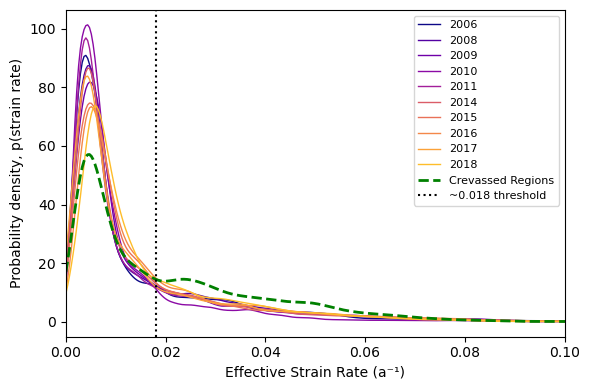

In [107]:
fig, ax = plt.subplots(figsize=(6, 4))

years = list(range(2006, 2019))
n = len(years) + 2
cmap = cm.get_cmap('plasma', n)
area_colour_dict = {year: cmap(i / (n - 1)) for i, year in enumerate(years)}

for year, pdf_all in pdfs_all.items():
    ax.plot(x_vals, pdf_all, lw=1, label=f"{year}", color=area_colour_dict[year])

ax.plot(x_vals, pdf_crev, color='green', lw=2, linestyle="--", label="Crevassed Regions")
ax.axvline(x=0.018, color='k', linestyle=':', linewidth=1.5, label="~0.018 threshold")

ax.set_xlabel("Effective Strain Rate (a⁻¹)")
ax.set_ylabel("Probability density, p(strain rate)")
ax.set_xlim(0, 0.1)
ax.legend(fontsize=8)
plt.tight_layout()
plt.savefig("CIS_PDFs_all_years.jpg", dpi=500, bbox_inches="tight")
plt.show()


In [109]:
with rasterio.open("eff_MEDIAN.tif") as src:    # note to self: CHANGE THIS INPUT AS NEEDED
    strain_data = src.read(1)  
    strain_data = strain_data.astype(float)
    strain_data[strain_data == src.nodata] = np.nan  
    strain_data[strain_data == 0.0] = np.nan 
    affine = src.transform

C:\Users\jjls0\AppData\Local\Temp\ipykernel_1276\2767860096.py:12: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('plasma', n)
C:\Users\jjls0\AppData\Local\Temp\ipykernel_1276\2767860096.py:46: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  crev_patch = mpatches.Patch(color='grey', label='Crevasses Present', alpha=0.6, edgecolor='black')


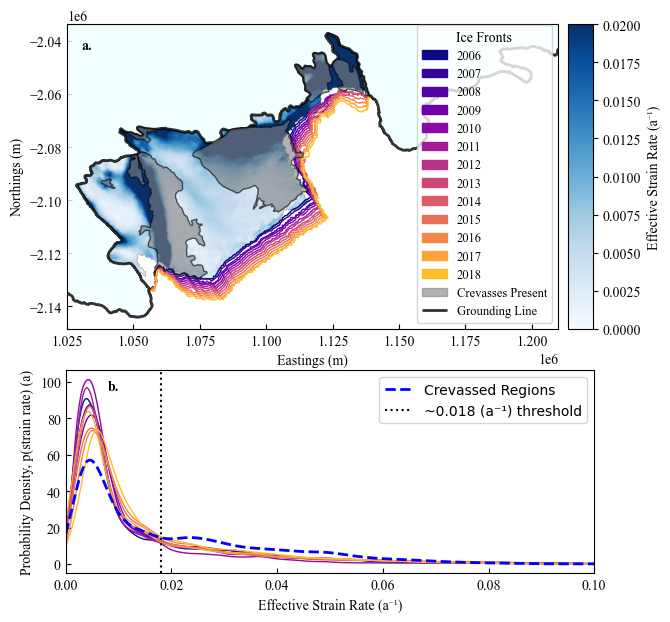

In [113]:
fig, axes = plt.subplots(2, 1, figsize=(160/25.4, 160/25.4), gridspec_kw={'height_ratios': [3,2]})

# ========================
# Subplot (a) — Map panel
# ========================
ax0 = axes[0]
#vel_mean = np.ma.masked_invalid(vel_mean)
first_img_plot = ax0.imshow(strain_data, cmap='Blues', extent=extent, origin='upper', vmin=0, vmax=0.02)

years = list(range(2006, 2019))
n = len(years) + 2
cmap = cm.get_cmap('plasma', n)
area_colour_dict = {year: cmap(i / (n - 1)) for i, year in enumerate(years)}

for year in years:
    gdf = globals().get(f'ice_front_{year}')  
    if gdf is not None:
        gdf.plot(ax=ax0, edgecolor=area_colour_dict[year], facecolor='none', linewidth=1)

groundingline.plot(ax=ax0, edgecolor='black', facecolor='azure', linewidth=2, label='Grounding Line', alpha=0.8)
current_crevasses.plot(ax=ax0, edgecolor='black', facecolor='grey', linewidth=1, alpha=0.6)

divider0 = make_axes_locatable(ax0)
cax0 = divider0.append_axes("right", size="5%", pad=0.1)
cbar0 = fig.colorbar(first_img_plot, cax=cax0)
cbar0.set_label("Effective Strain Rate (a⁻¹)", fontsize=10, fontfamily='Times New Roman')
for label in cbar0.ax.get_yticklabels():
    label.set_fontname('Times New Roman')
    label.set_fontsize(10)

ax0.set_xlabel('Eastings (m)', fontsize=10, fontfamily='Times New Roman')
ax0.set_ylabel('Northings (m)', fontsize=10, fontfamily='Times New Roman')
ax0.tick_params(direction='in')
ax0.set_xlim(xlimit2)
ax0.set_ylim(ylimit2)
ax0.set_aspect('equal')
ax0.xaxis.get_offset_text().set_fontsize(10)
ax0.xaxis.get_offset_text().set_family('Times New Roman')
ax0.yaxis.get_offset_text().set_fontsize(10)
ax0.yaxis.get_offset_text().set_family('Times New Roman')
for label in (ax0.get_xticklabels() + ax0.get_yticklabels()):
    label.set_fontsize(10)
    label.set_family('Times New Roman')

legend_handles = [mpatches.Patch(color=area_colour_dict[year], label=str(year)) for year in years]
crev_patch = mpatches.Patch(color='grey', label='Crevasses Present', alpha=0.6, edgecolor='black')
legend_handles.append(crev_patch)
extra_handles, _ = ax0.get_legend_handles_labels()
legend_handles += extra_handles
legend = ax0.legend(handles=legend_handles, title='Ice Fronts', loc='lower right',
                    prop={'size': 9, 'family': 'Times New Roman'}, title_fontsize=10)
legend.get_frame().set_linewidth(1)
legend.get_title().set_fontfamily('Times New Roman')

# ========================
# Subplot (b) — KDE panel
# ========================
ax1 = axes[1]

for year, pdf_all in pdfs_all.items():
    ax1.plot(x_vals, pdf_all, lw=1, color=area_colour_dict[year])

ax1.plot(x_vals, pdf_crev, color='blue', lw=2, linestyle="--", label="Crevassed Regions")
ax1.axvline(x=0.018, color='k', linestyle=':', linewidth=1.5, label="~0.018 (a⁻¹) threshold")

ax1.set_xlabel("Effective Strain Rate (a⁻¹)", fontsize=10, fontfamily='Times New Roman')
ax1.set_ylabel("Probability Density, p(strain rate) (a)", fontsize=10, fontfamily='Times New Roman')
ax1.set_xlim(0, 0.1)
ax1.tick_params(direction='in')
for label in (ax1.get_xticklabels() + ax1.get_yticklabels()):
    label.set_fontsize(10)
    label.set_family('Times New Roman')
ax1.legend(fontsize=10)

# ========================
# Panel labels
# ========================
ax0.text(0.03, 0.95, "a.", transform=ax0.transAxes, fontsize=10, fontname='Times New Roman',
         fontweight='bold', va='top', ha='left')
ax1.text(0.08, 0.95, "b.", transform=ax1.transAxes, fontsize=10, fontname='Times New Roman',
         fontweight='bold', va='top', ha='left')

plt.tight_layout(pad=0.1, h_pad=0.2)
#plt.savefig('figure_2_MEDIAN_PDF.jpg', dpi=500, bbox_inches='tight')
plt.show()


C:\Users\jjls0\AppData\Local\Temp\ipykernel_1276\1291634658.py:12: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('plasma', n)
C:\Users\jjls0\AppData\Local\Temp\ipykernel_1276\1291634658.py:46: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  crev_patch = mpatches.Patch(color='grey', label='Crevasses Present', alpha=0.6, edgecolor='black')


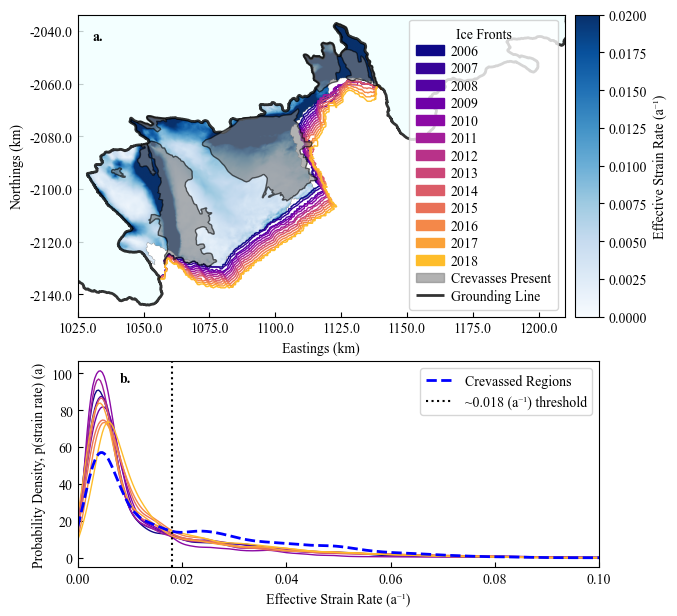

In [153]:
fig, axes = plt.subplots(2, 1, figsize=(160/25.4, 160/25.4), gridspec_kw={'height_ratios': [3,2]})

# ========================
# Subplot (a) — Map panel
# ========================
ax0 = axes[0]
#vel_mean = np.ma.masked_invalid(vel_mean)
first_img_plot = ax0.imshow(strain_data, cmap='Blues', extent=extent, origin='upper', vmin=0, vmax=0.02)

years = list(range(2006, 2019))
n = len(years) + 2
cmap = cm.get_cmap('plasma', n)
area_colour_dict = {year: cmap(i / (n - 1)) for i, year in enumerate(years)}

for year in years:
    gdf = globals().get(f'ice_front_{year}')  
    if gdf is not None:
        gdf.plot(ax=ax0, edgecolor=area_colour_dict[year], facecolor='none', linewidth=1)

groundingline.plot(ax=ax0, edgecolor='black', facecolor='azure', linewidth=2, label='Grounding Line', alpha=0.8)
current_crevasses.plot(ax=ax0, edgecolor='black', facecolor='grey', linewidth=1, alpha=0.6)

divider0 = make_axes_locatable(ax0)
cax0 = divider0.append_axes("right", size="5%", pad=0.1)
cbar0 = fig.colorbar(first_img_plot, cax=cax0)
cbar0.set_label("Effective Strain Rate (a⁻¹)", fontsize=10, fontfamily='Times New Roman')
for label in cbar0.ax.get_yticklabels():
    label.set_fontname('Times New Roman')
    label.set_fontsize(10)

ax0.set_xlabel('Eastings (m)', fontsize=10, fontfamily='Times New Roman')
ax0.set_ylabel('Northings (m)', fontsize=10, fontfamily='Times New Roman')
ax0.tick_params(direction='in')
ax0.set_xlim(xlimit2)
ax0.set_ylim(ylimit2)
ax0.set_aspect('equal')
ax0.xaxis.get_offset_text().set_fontsize(10)
ax0.xaxis.get_offset_text().set_family('Times New Roman')
ax0.yaxis.get_offset_text().set_fontsize(10)
ax0.yaxis.get_offset_text().set_family('Times New Roman')
for label in (ax0.get_xticklabels() + ax0.get_yticklabels()):
    label.set_fontsize(10)
    label.set_family('Times New Roman')

legend_handles = [mpatches.Patch(color=area_colour_dict[year], label=str(year)) for year in years]
crev_patch = mpatches.Patch(color='grey', label='Crevasses Present', alpha=0.6, edgecolor='black')
legend_handles.append(crev_patch)
extra_handles, _ = ax0.get_legend_handles_labels()
legend_handles += extra_handles
legend = ax0.legend(
    handles=legend_handles,
    title='Ice Fronts',
    loc='lower right',
    prop={'size': 10, 'family': 'Times New Roman'},
    title_fontsize=10,
    borderpad=0.5,        # remove padding around the legend
    labelspacing=0.25,     # reduce spacing between entries
    handletextpad=0.5,  # space between marker and text (adjust as needed)
    handlelength=2      # length of the marker in legend
)
legend.get_frame().set_linewidth(1)
legend.get_title().set_fontfamily('Times New Roman')


# ========================
# Subplot (b) — KDE panel
# ========================
ax1 = axes[1]

for year, pdf_all in pdfs_all.items():
    ax1.plot(x_vals, pdf_all, lw=1, color=area_colour_dict[year])

ax1.plot(x_vals, pdf_crev, color='blue', lw=2, linestyle="--", label="Crevassed Regions")
ax1.axvline(x=0.018, color='k', linestyle=':', linewidth=1.5, label="~0.018 (a⁻¹) threshold")

ax1.set_xlabel("Effective Strain Rate (a⁻¹)", fontsize=10, fontfamily='Times New Roman')
ax1.set_ylabel("Probability Density, p(strain rate) (a)", fontsize=10, fontfamily='Times New Roman')
ax1.set_xlim(0, 0.1)
ax1.tick_params(direction='in')
for label in (ax1.get_xticklabels() + ax1.get_yticklabels()):
    label.set_fontsize(10)
    label.set_family('Times New Roman')
ax1.legend(fontsize=10, prop={'family':'Times New Roman'})


from matplotlib.ticker import FuncFormatter

# Convert axes from meters to kilometers
ax0.xaxis.set_major_formatter(FuncFormatter(lambda x, _: x/1000))
ax0.yaxis.set_major_formatter(FuncFormatter(lambda y, _: y/1000))

# Update labels
ax0.set_xlabel('Eastings (km)', fontsize=10, fontfamily='Times New Roman')
ax0.set_ylabel('Northings (km)', fontsize=10, fontfamily='Times New Roman')

# ========================
# Panel labels
# ========================
ax0.text(0.03, 0.95, "a.", transform=ax0.transAxes, fontsize=10, fontname='Times New Roman',
         fontweight='bold', va='top', ha='left')
ax1.text(0.08, 0.95, "b.", transform=ax1.transAxes, fontsize=10, fontname='Times New Roman',
         fontweight='bold', va='top', ha='left')

plt.tight_layout(pad=0.1, h_pad=0.2)
#plt.savefig('FINAL_FIG_6.jpg', dpi=500, bbox_inches='tight')
plt.show()
